In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 
from clean_data_functions import * #Importing our defined functions to clean
from scipy.stats import mode
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None) 
sns.set_theme(style ="whitegrid")

%matplotlib inline

In [2]:
eco_bici = pd.read_csv("DATA/year_ecobici_df.csv")

In [3]:
eco_bici.head(100)

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
0,M,24.0,2252039,007,31/07/2023,23:52:38,064,01/08/2023,00:00:03
1,M,33.0,8626897,206,31/07/2023,23:48:01,212,01/08/2023,00:00:20
2,M,34.0,4940557,215,31/07/2023,23:55:50,212,01/08/2023,00:00:30
3,F,30.0,2036523,291,31/07/2023,23:32:42,082,01/08/2023,00:01:08
4,F,23.0,8079220,546,31/07/2023,23:51:09,498,01/08/2023,00:01:21
...,...,...,...,...,...,...,...,...,...
95,F,29.0,5310842,258,01/08/2023,00:04:11,369,01/08/2023,00:29:25
96,M,16.0,7402217,015,01/08/2023,00:24:48,006,01/08/2023,00:29:41
97,M,46.0,5514278,015,01/08/2023,00:23:18,006,01/08/2023,00:30:04
98,M,21.0,2998797,016,01/08/2023,00:13:17,181,01/08/2023,00:30:07


In [4]:
eco_bici.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13735648 entries, 0 to 13735647
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Genero_Usuario         object 
 1   Edad_Usuario           float64
 2   Bici                   int64  
 3   Ciclo_Estacion_Retiro  object 
 4   Fecha_Retiro           object 
 5   Hora_Retiro            object 
 6   Ciclo_EstacionArribo   object 
 7   Fecha Arribo           object 
 8   Hora_Arribo            object 
dtypes: float64(1), int64(1), object(7)
memory usage: 943.2+ MB


In [5]:
null_check(eco_bici)

Total null values per row: 
0           0
1           0
2           0
3           0
4           0
           ..
13735643    0
13735644    0
13735645    0
13735646    0
13735647    0
Length: 13735648, dtype: int64

Total null values per column: 
Genero_Usuario           150
Edad_Usuario             195
Bici                       0
Ciclo_Estacion_Retiro      0
Fecha_Retiro               0
Hora_Retiro                0
Ciclo_EstacionArribo       0
Fecha Arribo               0
Hora_Arribo                0
dtype: int64



In [6]:
dropna_rows_cols(eco_bici, 6, 1500)

Deleted 0 rows
Deleted 0 columns


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
0,M,24.0,2252039,007,31/07/2023,23:52:38,064,01/08/2023,00:00:03
1,M,33.0,8626897,206,31/07/2023,23:48:01,212,01/08/2023,00:00:20
2,M,34.0,4940557,215,31/07/2023,23:55:50,212,01/08/2023,00:00:30
3,F,30.0,2036523,291,31/07/2023,23:32:42,082,01/08/2023,00:01:08
4,F,23.0,8079220,546,31/07/2023,23:51:09,498,01/08/2023,00:01:21
...,...,...,...,...,...,...,...,...,...
13735643,M,33.0,6683080,022,31/01/2024,23:47:55,041,31/01/2024,23:59:41
13735644,M,28.0,2005171,150,31/01/2024,23:56:03,155,31/01/2024,23:59:53
13735645,M,26.0,6842108,545,31/01/2024,23:48:34,115,31/01/2024,23:59:56
13735646,M,53.0,5478714,007,31/01/2024,23:45:28,151,31/01/2024,23:59:58


In [7]:
eco_bici.columns

Index(['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro',
       'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo',
       'Hora_Arribo'],
      dtype='object')

In [8]:
eco_bici_df= eco_bici.rename(columns={'Genero_Usuario': 'user_gender',
                                       'Edad_Usuario': 'user_age',
                                       'Bici': 'bike_id',
                                       'Ciclo_Estacion_Retiro': 'pickup_station',
                                       'Fecha_Retiro': 'pickup_date',
                                       'Hora_Retiro': 'pickup_time',
                                       'Ciclo_EstacionArribo': 'return_station',
                                       'Fecha Arribo': 'return_date',
                                       'Hora_Arribo': 'return_time'})


In [9]:
eco_bici_df.columns

Index(['user_gender', 'user_age', 'bike_id', 'pickup_station', 'pickup_date',
       'pickup_time', 'return_station', 'return_date', 'return_time'],
      dtype='object')

In [10]:
eco_bici_df["user_gender"] = eco_bici_df["user_gender"].fillna('undefined')

In [11]:
# #Interesting data in case we want to show the unknown cases where the bikes where not returned, time, age, or finding patterns
# ecobicis_never_returned = eco_bici_df[eco_bici_df['return_station'].isna() | eco_bici_df['return_date'].isna() | eco_bici_df['return_time'].isna()]
# ecobicis_never_returned

In [12]:
clean_eco_bici_df= eco_bici_df.dropna(subset=['return_station', 'return_date', 'return_time'])
clean_eco_bici_df

,user_gender,user_age,bike_id,pickup_station,pickup_date,pickup_time,return_station,return_date,return_time
0,M,24.0,2252039,007,31/07/2023,23:52:38,064,01/08/2023,00:00:03
1,M,33.0,8626897,206,31/07/2023,23:48:01,212,01/08/2023,00:00:20
2,M,34.0,4940557,215,31/07/2023,23:55:50,212,01/08/2023,00:00:30
3,F,30.0,2036523,291,31/07/2023,23:32:42,082,01/08/2023,00:01:08
4,F,23.0,8079220,546,31/07/2023,23:51:09,498,01/08/2023,00:01:21
...,...,...,...,...,...,...,...,...,...
13735643,M,33.0,6683080,022,31/01/2024,23:47:55,041,31/01/2024,23:59:41
13735644,M,28.0,2005171,150,31/01/2024,23:56:03,155,31/01/2024,23:59:53
13735645,M,26.0,6842108,545,31/01/2024,23:48:34,115,31/01/2024,23:59:56
13735646,M,53.0,5478714,007,31/01/2024,23:45:28,151,31/01/2024,23:59:58


In [13]:
clean_eco_bici_df= eco_bici_df.dropna(subset=['return_station', 'return_date', 'return_time'])
clean_eco_bici_df['user_gender'].unique()

array(['M', 'F', 'O', '?', 'undefined'], dtype=object)

In [14]:
clean_eco_bici_df['user_gender'] = clean_eco_bici_df['user_gender'].replace(['O', '?'], 'undefined')

In [15]:
clean_eco_bici_df1= clean_eco_bici_df.dropna(subset=['user_age'])
null_check(clean_eco_bici_df1)

Total null values per row: 
0           0
1           0
2           0
3           0
4           0
           ..
13735643    0
13735644    0
13735645    0
13735646    0
13735647    0
Length: 13735453, dtype: int64

Total null values per column: 
user_gender       0
user_age          0
bike_id           0
pickup_station    0
pickup_date       0
pickup_time       0
return_station    0
return_date       0
return_time       0
dtype: int64



In [16]:
clean_eco_bici_df1['pickup_time'] = clean_eco_bici_df1['pickup_time'].apply(lambda x: '{:02d}:{:02d}:00'.format(*map(int, x.replace('.', ':').split(':'))))
clean_eco_bici_df1['return_time'] = clean_eco_bici_df1['return_time'].apply(lambda x: '{:02d}:{:02d}:00'.format(*map(int, x.replace('.', ':').split(':'))))
clean_eco_bici_df1

,user_gender,user_age,bike_id,pickup_station,pickup_date,pickup_time,return_station,return_date,return_time
0,M,24.0,2252039,007,31/07/2023,23:52:00,064,01/08/2023,00:00:00
1,M,33.0,8626897,206,31/07/2023,23:48:00,212,01/08/2023,00:00:00
2,M,34.0,4940557,215,31/07/2023,23:55:00,212,01/08/2023,00:00:00
3,F,30.0,2036523,291,31/07/2023,23:32:00,082,01/08/2023,00:01:00
4,F,23.0,8079220,546,31/07/2023,23:51:00,498,01/08/2023,00:01:00
...,...,...,...,...,...,...,...,...,...
13735643,M,33.0,6683080,022,31/01/2024,23:47:00,041,31/01/2024,23:59:00
13735644,M,28.0,2005171,150,31/01/2024,23:56:00,155,31/01/2024,23:59:00
13735645,M,26.0,6842108,545,31/01/2024,23:48:00,115,31/01/2024,23:59:00
13735646,M,53.0,5478714,007,31/01/2024,23:45:00,151,31/01/2024,23:59:00


In [31]:
clean_eco_bici_df1.isna().sum()

user_gender       0
user_age          0
bike_id           0
pickup_station    0
pickup_date       0
pickup_time       0
return_station    0
return_date       0
return_time       0
dtype: int64

In [18]:
clean_eco_bici_df1['pickup_time'].apply(lambda x: datetime.strptime(x, "%H:%M:%S"))
clean_eco_bici_df1['pickup_time'] 
pd.to_timedelta(clean_eco_bici_df1['pickup_time'])

clean_eco_bici_df1.isna().sum()

0          1900-01-01 23:52:00
1          1900-01-01 23:48:00
2          1900-01-01 23:55:00
3          1900-01-01 23:32:00
4          1900-01-01 23:51:00
                   ...        
13735643   1900-01-01 23:47:00
13735644   1900-01-01 23:56:00
13735645   1900-01-01 23:48:00
13735646   1900-01-01 23:45:00
13735647   1900-01-01 23:48:00
Name: pickup_time, Length: 13735453, dtype: datetime64[ns]

0           23:52:00
1           23:48:00
2           23:55:00
3           23:32:00
4           23:51:00
              ...   
13735643    23:47:00
13735644    23:56:00
13735645    23:48:00
13735646    23:45:00
13735647    23:48:00
Name: pickup_time, Length: 13735453, dtype: object

0          0 days 23:52:00
1          0 days 23:48:00
2          0 days 23:55:00
3          0 days 23:32:00
4          0 days 23:51:00
                 ...      
13735643   0 days 23:47:00
13735644   0 days 23:56:00
13735645   0 days 23:48:00
13735646   0 days 23:45:00
13735647   0 days 23:48:00
Name: pickup_time, Length: 13735453, dtype: timedelta64[ns]

user_gender       0
user_age          0
bike_id           0
pickup_station    0
pickup_date       0
pickup_time       0
return_station    0
return_date       0
return_time       0
dtype: int64

In [19]:
#Convert the time column to datetime format
clean_eco_bici_df1['pickup_time']= pd.to_datetime(clean_eco_bici_df1['pickup_time'], format='%H:%M:%S', errors='coerce').dt.time
clean_eco_bici_df1['return_time']= pd.to_datetime(clean_eco_bici_df1['return_time'], format='%H:%M:%S', errors='coerce').dt.time

clean_eco_bici_df1

,user_gender,user_age,bike_id,pickup_station,pickup_date,pickup_time,return_station,return_date,return_time
0,M,24.0,2252039,007,31/07/2023,23:52:00,064,01/08/2023,00:00:00
1,M,33.0,8626897,206,31/07/2023,23:48:00,212,01/08/2023,00:00:00
2,M,34.0,4940557,215,31/07/2023,23:55:00,212,01/08/2023,00:00:00
3,F,30.0,2036523,291,31/07/2023,23:32:00,082,01/08/2023,00:01:00
4,F,23.0,8079220,546,31/07/2023,23:51:00,498,01/08/2023,00:01:00
...,...,...,...,...,...,...,...,...,...
13735643,M,33.0,6683080,022,31/01/2024,23:47:00,041,31/01/2024,23:59:00
13735644,M,28.0,2005171,150,31/01/2024,23:56:00,155,31/01/2024,23:59:00
13735645,M,26.0,6842108,545,31/01/2024,23:48:00,115,31/01/2024,23:59:00
13735646,M,53.0,5478714,007,31/01/2024,23:45:00,151,31/01/2024,23:59:00


### wrangling ecobici df and creating aggregated df

In [20]:
clean_eco_bici_df['pickup_date'] = pd.to_datetime(clean_eco_bici_df['pickup_date'], format='%d/%m/%Y', errors='coerce')
#clean_eco_bici_df['pickup_time'] = pd.to_datetime(clean_eco_bici_df['pickup_time'], format='%H:%M:%S', errors='coerce').dt.time
clean_eco_bici_df['return_date'] = pd.to_datetime(clean_eco_bici_df['return_date'], format='%d/%m/%Y', errors='coerce')
#clean_eco_bici_df['return_time'] = pd.to_datetime(clean_eco_bici_df['return_time'], format='%H:%M:%S', errors='coerce').dt.time
null_check(clean_eco_bici_df)

Total null values per row: 
0           0
1           0
2           0
3           0
4           0
           ..
13735643    0
13735644    0
13735645    0
13735646    0
13735647    0
Length: 13735648, dtype: int64

Total null values per column: 
user_gender         0
user_age          195
bike_id             0
pickup_station      0
pickup_date         0
pickup_time         0
return_station      0
return_date         0
return_time         0
dtype: int64



In [21]:
clean_eco_bici_df= clean_eco_bici_df.dropna(subset=['pickup_date','return_date', 'user_age'])

In [22]:
clean_eco_bici_df['pickup_station'] = pd.to_numeric(clean_eco_bici_df['pickup_station'], errors='coerce')
clean_eco_bici_df['return_station'] = pd.to_numeric(clean_eco_bici_df['pickup_station'], errors='coerce')

In [23]:
# Concatenate 'pickup_date' and 'pickup_time' to create a new combined datetime column
clean_eco_bici_df['pickup_datetime'] = pd.to_datetime(clean_eco_bici_df['pickup_date'] + pd.to_timedelta(clean_eco_bici_df['pickup_time'].astype(str)))

In [24]:
clean_eco_bici_df['pickup_datetime'].dt.floor('H')

0          2023-07-31 23:00:00
1          2023-07-31 23:00:00
2          2023-07-31 23:00:00
3          2023-07-31 23:00:00
4          2023-07-31 23:00:00
                   ...        
13735643   2024-01-31 23:00:00
13735644   2024-01-31 23:00:00
13735645   2024-01-31 23:00:00
13735646   2024-01-31 23:00:00
13735647   2024-01-31 23:00:00
Name: pickup_datetime, Length: 13735453, dtype: datetime64[ns]

In [25]:
# Map the combined datetime to a new hourly datetime column
clean_eco_bici_df['hourly_aggregated'] = clean_eco_bici_df['pickup_datetime'].dt.floor('H')

In [26]:
# Calculate duration of the rental
clean_eco_bici_df['return_datetime'] = pd.to_datetime(clean_eco_bici_df['return_date'] + pd.to_timedelta(clean_eco_bici_df['return_time'].astype(str)))
clean_eco_bici_df['duration'] = clean_eco_bici_df['return_datetime'] - clean_eco_bici_df['pickup_datetime']

In [27]:
# identifying the individual pickup stations 
pickup_stations = clean_eco_bici_df.pickup_station.unique()
pickup_stations

array([7.000000e+00, 2.060000e+02, 2.150000e+02, 2.910000e+02,
       5.460000e+02, 3.060000e+02, 6.500000e+01, 2.210000e+02,
       3.940000e+02, 3.750000e+02, 7.400000e+01, 3.960000e+02,
       1.360000e+02, 1.290000e+02, 2.830000e+02, 3.550000e+02,
       1.200000e+01, 6.700000e+01, 1.870000e+02, 3.370000e+02,
                nan, 5.030000e+02, 2.200000e+02, 4.300000e+01,
       7.300000e+01, 5.900000e+01, 2.260000e+02, 3.720000e+02,
       3.400000e+02, 1.740000e+02, 1.620000e+02, 1.630000e+02,
       4.490000e+02, 6.400000e+01, 3.000000e+01, 3.980000e+02,
       1.480000e+02, 6.100000e+01, 1.210000e+02, 3.200000e+01,
       2.950000e+02, 5.510000e+02, 1.890000e+02, 3.100000e+01,
       2.500000e+01, 5.200000e+01, 9.900000e+01, 8.600000e+01,
       4.000000e+01, 6.900000e+01, 1.550000e+02, 7.600000e+01,
       1.230000e+02, 3.930000e+02, 5.300000e+01, 5.070000e+02,
       4.690000e+02, 1.100000e+01, 3.000000e+02, 5.500000e+02,
       3.200000e+02, 1.320000e+02, 2.940000e+02, 4.1000

In [28]:
stations_df = pd.DataFrame(clean_eco_bici_df.pickup_station.value_counts()).reset_index()
stations_df.head(50)
# station 64, 27, 1, 43, 18 and 14 have highest pickup counts

,pickup_station,count
0,64.0,105806
1,27.0,104188
2,1.0,79356
3,43.0,76390
4,18.0,75612
5,14.0,73013
6,28.0,69840
7,53.0,69565
8,208.0,68858
9,72.0,65846


In [29]:
clean_eco_bici_df[clean_eco_bici_df['pickup_station'].isin([6])]

,user_gender,user_age,bike_id,pickup_station,pickup_date,pickup_time,return_station,return_date,return_time,pickup_datetime,hourly_aggregated,return_datetime,duration
523,M,29.0,4481933,6.0,2023-08-01,06:10:08,6.0,2023-08-01,06:16:20,2023-08-01 06:10:08,2023-08-01 06:00:00,2023-08-01 06:16:20,0 days 00:06:12
524,F,24.0,2304590,6.0,2023-08-01,06:09:50,6.0,2023-08-01,06:16:21,2023-08-01 06:09:50,2023-08-01 06:00:00,2023-08-01 06:16:21,0 days 00:06:31
646,M,36.0,7402217,6.0,2023-08-01,06:20:56,6.0,2023-08-01,06:30:00,2023-08-01 06:20:56,2023-08-01 06:00:00,2023-08-01 06:30:00,0 days 00:09:04
1675,M,28.0,8500951,6.0,2023-08-01,07:06:22,6.0,2023-08-01,07:16:44,2023-08-01 07:06:22,2023-08-01 07:00:00,2023-08-01 07:16:44,0 days 00:10:22
2189,F,36.0,3836327,6.0,2023-08-01,07:16:12,6.0,2023-08-01,07:35:47,2023-08-01 07:16:12,2023-08-01 07:00:00,2023-08-01 07:35:47,0 days 00:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13734374,F,33.0,3026184,6.0,2024-01-31,22:30:28,6.0,2024-01-31,22:48:18,2024-01-31 22:30:28,2024-01-31 22:00:00,2024-01-31 22:48:18,0 days 00:17:50
13734654,M,32.0,4277828,6.0,2024-01-31,22:51:46,6.0,2024-01-31,23:00:27,2024-01-31 22:51:46,2024-01-31 22:00:00,2024-01-31 23:00:27,0 days 00:08:41
13734931,F,29.0,6510093,6.0,2024-01-31,23:09:35,6.0,2024-01-31,23:15:34,2024-01-31 23:09:35,2024-01-31 23:00:00,2024-01-31 23:15:34,0 days 00:05:59
13734940,M,41.0,5299292,6.0,2024-01-31,22:31:46,6.0,2024-01-31,23:15:57,2024-01-31 22:31:46,2024-01-31 22:00:00,2024-01-31 23:15:57,0 days 00:44:11


<b> Adding a feature indicating whether the day of rental was a business day or not</b>

In [30]:
# Map the hourly_aggregated to a new column indicating business day [1] or weekend/holiday [0]

# Public holidays in Mexico City:

public_holidays = [ # month and day
    '01-01', # new year's day
    '02-05', # constistution day
    '03-21', # Benito Juárez's Birthday
    '05-01', # Labour day
    '09-16', # Independence day
    '11-20', # Revolution day
    '12-25', # Christmas
]

# convert public_holidays to datetime format
public_holidays_dt = [datetime.strptime(holiday, '%m-%d') for holiday in public_holidays]

# use apply function to check whether datetime in 'hourly_aggregated' is a public holiday or weekend
clean_eco_bici_df['is_business_day'] = clean_eco_bici_df['hourly_aggregated'].apply(
    lambda x: 1 if (x.month, x.day) not in [(holiday.month, holiday.day) for holiday in public_holidays_dt] and (x.weekday() < 5) else 0
)

clean_eco_bici_df

,user_gender,user_age,bike_id,pickup_station,pickup_date,pickup_time,return_station,return_date,return_time,pickup_datetime,hourly_aggregated,return_datetime,duration,is_business_day
0,M,24.0,2252039,7.0,2023-07-31,23:52:38,7.0,2023-08-01,00:00:03,2023-07-31 23:52:38,2023-07-31 23:00:00,2023-08-01 00:00:03,0 days 00:07:25,1
1,M,33.0,8626897,206.0,2023-07-31,23:48:01,206.0,2023-08-01,00:00:20,2023-07-31 23:48:01,2023-07-31 23:00:00,2023-08-01 00:00:20,0 days 00:12:19,1
2,M,34.0,4940557,215.0,2023-07-31,23:55:50,215.0,2023-08-01,00:00:30,2023-07-31 23:55:50,2023-07-31 23:00:00,2023-08-01 00:00:30,0 days 00:04:40,1
3,F,30.0,2036523,291.0,2023-07-31,23:32:42,291.0,2023-08-01,00:01:08,2023-07-31 23:32:42,2023-07-31 23:00:00,2023-08-01 00:01:08,0 days 00:28:26,1
4,F,23.0,8079220,546.0,2023-07-31,23:51:09,546.0,2023-08-01,00:01:21,2023-07-31 23:51:09,2023-07-31 23:00:00,2023-08-01 00:01:21,0 days 00:10:12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735643,M,33.0,6683080,22.0,2024-01-31,23:47:55,22.0,2024-01-31,23:59:41,2024-01-31 23:47:55,2024-01-31 23:00:00,2024-01-31 23:59:41,0 days 00:11:46,1
13735644,M,28.0,2005171,150.0,2024-01-31,23:56:03,150.0,2024-01-31,23:59:53,2024-01-31 23:56:03,2024-01-31 23:00:00,2024-01-31 23:59:53,0 days 00:03:50,1
13735645,M,26.0,6842108,545.0,2024-01-31,23:48:34,545.0,2024-01-31,23:59:56,2024-01-31 23:48:34,2024-01-31 23:00:00,2024-01-31 23:59:56,0 days 00:11:22,1
13735646,M,53.0,5478714,7.0,2024-01-31,23:45:28,7.0,2024-01-31,23:59:58,2024-01-31 23:45:28,2024-01-31 23:00:00,2024-01-31 23:59:58,0 days 00:14:30,1


In [32]:
clean_eco_bici_df = clean_eco_bici_df.sort_values(by='pickup_datetime')
clean_eco_bici_df.reset_index(drop=True, inplace=True)

In [33]:
clean_eco_bici_df = clean_eco_bici_df.dropna(subset=['pickup_station','return_station'])

In [34]:
null_check(clean_eco_bici_df)

Total null values per row: 
0           0
1           0
2           0
3           0
4           0
           ..
13735448    0
13735449    0
13735450    0
13735451    0
13735452    0
Length: 13047307, dtype: int64

Total null values per column: 
user_gender          0
user_age             0
bike_id              0
pickup_station       0
pickup_date          0
pickup_time          0
return_station       0
return_date          0
return_time          0
pickup_datetime      0
hourly_aggregated    0
return_datetime      0
duration             0
is_business_day      0
dtype: int64



In [35]:
# Define columns to convert to integers
columns_to_convert = ['user_age', 'pickup_station', 'return_station']

# Convert specified columns to integers
clean_eco_bici_df[columns_to_convert] = clean_eco_bici_df[columns_to_convert].astype(int)

data_frame_overview(clean_eco_bici_df)

Column names: 
 Index(['user_gender', 'user_age', 'bike_id', 'pickup_station', 'pickup_date',
       'pickup_time', 'return_station', 'return_date', 'return_time',
       'pickup_datetime', 'hourly_aggregated', 'return_datetime', 'duration',
       'is_business_day'],
      dtype='object')

Dimensions: (13047307, 14)

<class 'pandas.core.frame.DataFrame'>
Index: 13047307 entries, 0 to 13735452
Data columns (total 14 columns):
 #   Column             Dtype          
---  ------             -----          
 0   user_gender        object         
 1   user_age           int64          
 2   bike_id            int64          
 3   pickup_station     int64          
 4   pickup_date        datetime64[ns] 
 5   pickup_time        object         
 6   return_station     int64          
 7   return_date        datetime64[ns] 
 8   return_time        object         
 9   pickup_datetime    datetime64[ns] 
 10  hourly_aggregated  datetime64[ns] 
 11  return_datetime    datetime64[ns] 
 12  durat

,user_gender,user_age,bike_id,pickup_station,pickup_date,pickup_time,return_station,return_date,return_time,pickup_datetime,hourly_aggregated,return_datetime,duration,is_business_day
0,M,35,8908451,81,2022-09-03,18:45:42.3370,81,2023-02-02,19:09:36.7840,2022-09-03 18:45:42.337,2022-09-03 18:00:00,2023-02-02 19:09:36.784,152 days 00:23:54.447000,0
1,undefined,29,5380423,56,2022-09-30,12:24:36,56,2023-11-24,15:13:34,2022-09-30 12:24:36.000,2022-09-30 12:00:00,2023-11-24 15:13:34.000,420 days 02:48:58,1
2,undefined,32,5218094,56,2022-09-30,13:17:30.6120,56,2023-02-09,13:14:13.9300,2022-09-30 13:17:30.612,2022-09-30 13:00:00,2023-02-09 13:14:13.930,131 days 23:56:43.318000,1
3,undefined,25,7278658,56,2022-09-30,13:20:09.0510,56,2023-02-09,13:11:41.3290,2022-09-30 13:20:09.051,2022-09-30 13:00:00,2023-02-09 13:11:41.329,131 days 23:51:32.278000,1
4,M,48,4031258,22,2022-11-10,21:26:19.3790,22,2023-02-02,19:11:23.2350,2022-11-10 21:26:19.379,2022-11-10 21:00:00,2023-02-02 19:11:23.235,83 days 21:45:03.856000,1
5,F,30,3561073,287,2022-11-13,19:23:04.5660,287,2023-02-17,12:08:38.0860,2022-11-13 19:23:04.566,2022-11-13 19:00:00,2023-02-17 12:08:38.086,95 days 16:45:33.520000,0
6,M,29,8938029,302,2022-11-15,16:52:21,302,2023-03-06,20:20:00,2022-11-15 16:52:21.000,2022-11-15 16:00:00,2023-03-06 20:20:00.000,111 days 03:27:39,1
7,M,43,8296352,19,2022-11-18,21:11:36.3090,19,2023-01-17,17:17:07.2610,2022-11-18 21:11:36.309,2022-11-18 21:00:00,2023-01-17 17:17:07.261,59 days 20:05:30.952000,1
8,F,37,6537930,116,2022-11-28,15:07:47.0830,116,2023-01-26,16:18:13.7580,2022-11-28 15:07:47.083,2022-11-28 15:00:00,2023-01-26 16:18:13.758,59 days 01:10:26.675000,1
9,M,54,2502870,131,2022-12-04,13:04:07.8950,131,2023-01-17,17:40:14.5700,2022-12-04 13:04:07.895,2022-12-04 13:00:00,2023-01-17 17:40:14.570,44 days 04:36:06.675000,0


<b>Split dataset into individual dataframes per bike station</b>

In [36]:
# saving each individual dataframe into a dictionary, where station number is key and df is value
# access each df later by calling the station number as value in the dict, e.g. stations_dict['station_number']

stations_dict = {}

for station in pickup_stations: 
    stations_dict[station] = clean_eco_bici_df[(clean_eco_bici_df['pickup_station']==station)]
    print(f"Dataframe for station {station} was created.")
print(f"Number of new dataframes: {len(stations_dict)}")

Dataframe for station 7.0 was created.
Dataframe for station 206.0 was created.
Dataframe for station 215.0 was created.
Dataframe for station 291.0 was created.
Dataframe for station 546.0 was created.
Dataframe for station 306.0 was created.
Dataframe for station 65.0 was created.
Dataframe for station 221.0 was created.
Dataframe for station 394.0 was created.
Dataframe for station 375.0 was created.
Dataframe for station 74.0 was created.
Dataframe for station 396.0 was created.
Dataframe for station 136.0 was created.
Dataframe for station 129.0 was created.
Dataframe for station 283.0 was created.
Dataframe for station 355.0 was created.
Dataframe for station 12.0 was created.
Dataframe for station 67.0 was created.
Dataframe for station 187.0 was created.
Dataframe for station 337.0 was created.
Dataframe for station nan was created.
Dataframe for station 503.0 was created.
Dataframe for station 220.0 was created.
Dataframe for station 43.0 was created.
Dataframe for station 73.

Dataframe for station 125.0 was created.
Dataframe for station 465.0 was created.
Dataframe for station 358.0 was created.
Dataframe for station 485.0 was created.
Dataframe for station 102.0 was created.
Dataframe for station 181.0 was created.
Dataframe for station 482.0 was created.
Dataframe for station 200.0 was created.
Dataframe for station 360.0 was created.
Dataframe for station 536.0 was created.
Dataframe for station 211.0 was created.
Dataframe for station 347.0 was created.
Dataframe for station 256.0 was created.
Dataframe for station 492.0 was created.
Dataframe for station 131.0 was created.
Dataframe for station 51.0 was created.
Dataframe for station 302.0 was created.
Dataframe for station 112.0 was created.
Dataframe for station 9.0 was created.
Dataframe for station 152.0 was created.
Dataframe for station 172.0 was created.
Dataframe for station 126.0 was created.
Dataframe for station 305.0 was created.
Dataframe for station 161.0 was created.
Dataframe for stati

Dataframe for station 417.0 was created.
Dataframe for station 45.0 was created.
Dataframe for station 370.0 was created.
Dataframe for station 58.0 was created.
Dataframe for station 461.0 was created.
Dataframe for station 35.0 was created.
Dataframe for station 349.0 was created.
Dataframe for station 502.0 was created.
Dataframe for station 100.0 was created.
Dataframe for station 284.0 was created.
Dataframe for station 167.0 was created.
Dataframe for station 659.0 was created.
Dataframe for station 239.0 was created.
Dataframe for station 421.0 was created.
Dataframe for station 44.0 was created.
Dataframe for station 262.0 was created.
Dataframe for station 316.0 was created.
Dataframe for station 479.0 was created.
Dataframe for station 292.0 was created.
Dataframe for station 457.0 was created.
Dataframe for station 454.0 was created.
Dataframe for station 307.0 was created.
Dataframe for station 656.0 was created.
Dataframe for station 319.0 was created.
Dataframe for statio

Dataframe for station 558.0 was created.
Dataframe for station 576.0 was created.
Dataframe for station 632.0 was created.
Dataframe for station 197.0 was created.
Dataframe for station 489.0 was created.
Dataframe for station 614.0 was created.
Dataframe for station 565.0 was created.
Dataframe for station 566.0 was created.
Dataframe for station 625.0 was created.
Dataframe for station 581.0 was created.
Dataframe for station 616.0 was created.
Dataframe for station 586.0 was created.
Dataframe for station 587.0 was created.
Dataframe for station 574.0 was created.
Dataframe for station 535.0 was created.
Dataframe for station 582.0 was created.
Dataframe for station 683.0 was created.
Dataframe for station 488.0 was created.
Dataframe for station 606.0 was created.
Dataframe for station 547.0 was created.
Dataframe for station 526.0 was created.
Dataframe for station 523.0 was created.
Dataframe for station 522.0 was created.
Dataframe for station 528.0 was created.
Number of new da

In [37]:
# calling dataframe for pickup_station 6
stations_dict[6]

,user_gender,user_age,bike_id,pickup_station,pickup_date,pickup_time,return_station,return_date,return_time,pickup_datetime,hourly_aggregated,return_datetime,duration,is_business_day
192,undefined,37,5125273,6,2023-01-01,07:20:32.0920,6,2023-01-01,07:26:50.6540,2023-01-01 07:20:32.092,2023-01-01 07:00:00,2023-01-01 07:26:50.654,0 days 00:06:18.562000,0
270,M,42,7262884,6,2023-01-01,08:27:14.8460,6,2023-01-01,08:33:27.2050,2023-01-01 08:27:14.846,2023-01-01 08:00:00,2023-01-01 08:33:27.205,0 days 00:06:12.359000,0
537,M,58,5202841,6,2023-01-01,10:15:45.9440,6,2023-01-01,10:51:12.3500,2023-01-01 10:15:45.944,2023-01-01 10:00:00,2023-01-01 10:51:12.350,0 days 00:35:26.406000,0
621,M,36,4868600,6,2023-01-01,10:38:44.2660,6,2023-01-01,10:43:13.4200,2023-01-01 10:38:44.266,2023-01-01 10:00:00,2023-01-01 10:43:13.420,0 days 00:04:29.154000,0
701,M,35,8541591,6,2023-01-01,10:58:21.0490,6,2023-01-01,11:06:10.2880,2023-01-01 10:58:21.049,2023-01-01 10:00:00,2023-01-01 11:06:10.288,0 days 00:07:49.239000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13734089,F,33,3026184,6,2024-01-31,22:30:28,6,2024-01-31,22:48:18,2024-01-31 22:30:28.000,2024-01-31 22:00:00,2024-01-31 22:48:18.000,0 days 00:17:50,1
13734120,M,41,5299292,6,2024-01-31,22:31:46,6,2024-01-31,23:15:57,2024-01-31 22:31:46.000,2024-01-31 22:00:00,2024-01-31 23:15:57.000,0 days 00:44:11,1
13734389,M,33,8081168,6,2024-01-31,22:43:10,6,2024-01-31,23:18:46,2024-01-31 22:43:10.000,2024-01-31 22:00:00,2024-01-31 23:18:46.000,0 days 00:35:36,1
13734551,M,32,4277828,6,2024-01-31,22:51:46,6,2024-01-31,23:00:27,2024-01-31 22:51:46.000,2024-01-31 22:00:00,2024-01-31 23:00:27.000,0 days 00:08:41,1


In [38]:
data_frame_overview(clean_eco_bici_df)

Column names: 
 Index(['user_gender', 'user_age', 'bike_id', 'pickup_station', 'pickup_date',
       'pickup_time', 'return_station', 'return_date', 'return_time',
       'pickup_datetime', 'hourly_aggregated', 'return_datetime', 'duration',
       'is_business_day'],
      dtype='object')

Dimensions: (13047307, 14)

<class 'pandas.core.frame.DataFrame'>
Index: 13047307 entries, 0 to 13735452
Data columns (total 14 columns):
 #   Column             Dtype          
---  ------             -----          
 0   user_gender        object         
 1   user_age           int64          
 2   bike_id            int64          
 3   pickup_station     int64          
 4   pickup_date        datetime64[ns] 
 5   pickup_time        object         
 6   return_station     int64          
 7   return_date        datetime64[ns] 
 8   return_time        object         
 9   pickup_datetime    datetime64[ns] 
 10  hourly_aggregated  datetime64[ns] 
 11  return_datetime    datetime64[ns] 
 12  durat

,user_gender,user_age,bike_id,pickup_station,pickup_date,pickup_time,return_station,return_date,return_time,pickup_datetime,hourly_aggregated,return_datetime,duration,is_business_day
0,M,35,8908451,81,2022-09-03,18:45:42.3370,81,2023-02-02,19:09:36.7840,2022-09-03 18:45:42.337,2022-09-03 18:00:00,2023-02-02 19:09:36.784,152 days 00:23:54.447000,0
1,undefined,29,5380423,56,2022-09-30,12:24:36,56,2023-11-24,15:13:34,2022-09-30 12:24:36.000,2022-09-30 12:00:00,2023-11-24 15:13:34.000,420 days 02:48:58,1
2,undefined,32,5218094,56,2022-09-30,13:17:30.6120,56,2023-02-09,13:14:13.9300,2022-09-30 13:17:30.612,2022-09-30 13:00:00,2023-02-09 13:14:13.930,131 days 23:56:43.318000,1
3,undefined,25,7278658,56,2022-09-30,13:20:09.0510,56,2023-02-09,13:11:41.3290,2022-09-30 13:20:09.051,2022-09-30 13:00:00,2023-02-09 13:11:41.329,131 days 23:51:32.278000,1
4,M,48,4031258,22,2022-11-10,21:26:19.3790,22,2023-02-02,19:11:23.2350,2022-11-10 21:26:19.379,2022-11-10 21:00:00,2023-02-02 19:11:23.235,83 days 21:45:03.856000,1
5,F,30,3561073,287,2022-11-13,19:23:04.5660,287,2023-02-17,12:08:38.0860,2022-11-13 19:23:04.566,2022-11-13 19:00:00,2023-02-17 12:08:38.086,95 days 16:45:33.520000,0
6,M,29,8938029,302,2022-11-15,16:52:21,302,2023-03-06,20:20:00,2022-11-15 16:52:21.000,2022-11-15 16:00:00,2023-03-06 20:20:00.000,111 days 03:27:39,1
7,M,43,8296352,19,2022-11-18,21:11:36.3090,19,2023-01-17,17:17:07.2610,2022-11-18 21:11:36.309,2022-11-18 21:00:00,2023-01-17 17:17:07.261,59 days 20:05:30.952000,1
8,F,37,6537930,116,2022-11-28,15:07:47.0830,116,2023-01-26,16:18:13.7580,2022-11-28 15:07:47.083,2022-11-28 15:00:00,2023-01-26 16:18:13.758,59 days 01:10:26.675000,1
9,M,54,2502870,131,2022-12-04,13:04:07.8950,131,2023-01-17,17:40:14.5700,2022-12-04 13:04:07.895,2022-12-04 13:00:00,2023-01-17 17:40:14.570,44 days 04:36:06.675000,0


<b> Aggregating each station's df by hour</b>

In [39]:
# For each dataframe in stations_dict:
# Group by 'hourly_datetime' and aggregate the data using aggregating functions (mean, mode, etc.)
# set index to hour and reindex to get full index and insert empty rows for missing hours, fillna with 0
# saving each individual data frame into a dictionary, where station number is key and df is value

full_index = pd.date_range(start='2023-01-01 00:00:00', end='2024-02-01 00:00:00', freq='H')
stations_hourly_dict = {}

for key,value in stations_dict.items():
    station_aggregated = value.groupby('hourly_aggregated',as_index=False).agg(
        {'bike_id': 'count',
         'duration': 'mean',
        }
    )
    # reformat df columns and duration values, reset index
    station_aggregated.rename(columns={'hourly_aggregated':'hour','bike_id':'rental_counts','duration':'avg_rental_duration'},inplace=True)
    station_aggregated.set_index('hour', drop=False, inplace=True)
    station_aggregated = station_aggregated.reindex(full_index)
    station_aggregated.hour = station_aggregated.index
    station_aggregated.fillna(0, inplace=True)
    
    # convert avg rental duration from timedelta to float, representing minutes
    station_aggregated['avg_rental_duration'] = station_aggregated['avg_rental_duration'].apply(
    lambda x: round(float(x.total_seconds() / 60) if isinstance(x, pd.Timedelta) else x, 2))
    
    # add is_business_day
    station_aggregated['is_business_day'] = pd.to_datetime(station_aggregated['hour']).apply(
    lambda x: 1 if (x.month, x.day) not in [(holiday.month, holiday.day) for holiday in public_holidays_dt] and (x.weekday() < 5) else 0
    )
    station_aggregated.drop('hour', axis=1,inplace=True)
    
    stations_hourly_dict[key] = station_aggregated

    print(f"Aggregated dataframe for station {key} was created.")
    
print(f"Number of new dataframes: {len(stations_hourly_dict)}")

Aggregated dataframe for station 7.0 was created.
Aggregated dataframe for station 206.0 was created.
Aggregated dataframe for station 215.0 was created.
Aggregated dataframe for station 291.0 was created.
Aggregated dataframe for station 546.0 was created.
Aggregated dataframe for station 306.0 was created.
Aggregated dataframe for station 65.0 was created.
Aggregated dataframe for station 221.0 was created.
Aggregated dataframe for station 394.0 was created.
Aggregated dataframe for station 375.0 was created.
Aggregated dataframe for station 74.0 was created.
Aggregated dataframe for station 396.0 was created.
Aggregated dataframe for station 136.0 was created.
Aggregated dataframe for station 129.0 was created.
Aggregated dataframe for station 283.0 was created.
Aggregated dataframe for station 355.0 was created.
Aggregated dataframe for station 12.0 was created.
Aggregated dataframe for station 67.0 was created.
Aggregated dataframe for station 187.0 was created.
Aggregated datafra

Aggregated dataframe for station 55.0 was created.
Aggregated dataframe for station 72.0 was created.
Aggregated dataframe for station 453.0 was created.
Aggregated dataframe for station 478.0 was created.
Aggregated dataframe for station 409.0 was created.
Aggregated dataframe for station 405.0 was created.
Aggregated dataframe for station 308.0 was created.
Aggregated dataframe for station 470.0 was created.
Aggregated dataframe for station 194.0 was created.
Aggregated dataframe for station 42.0 was created.
Aggregated dataframe for station 464.0 was created.
Aggregated dataframe for station 173.0 was created.
Aggregated dataframe for station 137.0 was created.
Aggregated dataframe for station 477.0 was created.
Aggregated dataframe for station 84.0 was created.
Aggregated dataframe for station 27.0 was created.
Aggregated dataframe for station 122.0 was created.
Aggregated dataframe for station 28.0 was created.
Aggregated dataframe for station 156.0 was created.
Aggregated datafra

Aggregated dataframe for station 474.0 was created.
Aggregated dataframe for station 210.0 was created.
Aggregated dataframe for station 153.0 was created.
Aggregated dataframe for station 299.0 was created.
Aggregated dataframe for station 146.0 was created.
Aggregated dataframe for station 184.0 was created.
Aggregated dataframe for station 115.0 was created.
Aggregated dataframe for station 428.0 was created.
Aggregated dataframe for station 330.0 was created.
Aggregated dataframe for station 452.0 was created.
Aggregated dataframe for station 62.0 was created.
Aggregated dataframe for station 545.0 was created.
Aggregated dataframe for station 471.0 was created.
Aggregated dataframe for station 491.0 was created.
Aggregated dataframe for station 658.0 was created.
Aggregated dataframe for station 481.0 was created.
Aggregated dataframe for station 75.0 was created.
Aggregated dataframe for station 186.0 was created.
Aggregated dataframe for station 331.0 was created.
Aggregated dat

Aggregated dataframe for station 615.0 was created.
Aggregated dataframe for station 597.0 was created.
Aggregated dataframe for station 694.0 was created.
Aggregated dataframe for station 630.0 was created.
Aggregated dataframe for station 617.0 was created.
Aggregated dataframe for station 691.0 was created.
Aggregated dataframe for station 689.0 was created.
Aggregated dataframe for station 692.0 was created.
Aggregated dataframe for station 701.0 was created.
Aggregated dataframe for station 618.0 was created.
Aggregated dataframe for station 612.0 was created.
Aggregated dataframe for station 661.0 was created.
Aggregated dataframe for station 652.0 was created.
Aggregated dataframe for station 688.0 was created.
Aggregated dataframe for station 629.0 was created.
Aggregated dataframe for station 651.0 was created.
Aggregated dataframe for station 649.0 was created.
Aggregated dataframe for station 602.0 was created.
Aggregated dataframe for station 624.0 was created.
Aggregated d

Aggregated dataframe for station 526.0 was created.
Aggregated dataframe for station 523.0 was created.
Aggregated dataframe for station 522.0 was created.
Aggregated dataframe for station 528.0 was created.
Number of new dataframes: 645


In [40]:
# calling aggregated dataframe for pickup_station 27
# check if is_business_day imputed correctly
stations_hourly_dict[6].head(50)

## should we filter out pickups with high duration? i.e. > 1 day??

,rental_counts,avg_rental_duration,is_business_day
2023-01-01 00:00:00,0.0,0.00,0
2023-01-01 01:00:00,0.0,0.00,0
2023-01-01 02:00:00,0.0,0.00,0
2023-01-01 03:00:00,0.0,0.00,0
2023-01-01 04:00:00,0.0,0.00,0
2023-01-01 05:00:00,0.0,0.00,0
2023-01-01 06:00:00,0.0,0.00,0
2023-01-01 07:00:00,1.0,6.31,0
2023-01-01 08:00:00,1.0,6.21,0
2023-01-01 09:00:00,0.0,0.00,0


In [41]:
stations_hourly_dict[6].to_csv('st6_ecobici.csv')
station_6 = pd.read_csv('st6_ecobici.csv')
station_6

,Unnamed: 0,rental_counts,avg_rental_duration,is_business_day
0,2023-01-01 00:00:00,0.0,0.00,0
1,2023-01-01 01:00:00,0.0,0.00,0
2,2023-01-01 02:00:00,0.0,0.00,0
3,2023-01-01 03:00:00,0.0,0.00,0
4,2023-01-01 04:00:00,0.0,0.00,0
...,...,...,...,...
9500,2024-01-31 20:00:00,7.0,17.41,1
9501,2024-01-31 21:00:00,7.0,12.78,1
9502,2024-01-31 22:00:00,9.0,15.53,1
9503,2024-01-31 23:00:00,1.0,5.98,1


In [42]:
clean_eco_bici_df

,user_gender,user_age,bike_id,pickup_station,pickup_date,pickup_time,return_station,return_date,return_time,pickup_datetime,hourly_aggregated,return_datetime,duration,is_business_day
0,M,35,8908451,81,2022-09-03,18:45:42.3370,81,2023-02-02,19:09:36.7840,2022-09-03 18:45:42.337,2022-09-03 18:00:00,2023-02-02 19:09:36.784,152 days 00:23:54.447000,0
1,undefined,29,5380423,56,2022-09-30,12:24:36,56,2023-11-24,15:13:34,2022-09-30 12:24:36.000,2022-09-30 12:00:00,2023-11-24 15:13:34.000,420 days 02:48:58,1
2,undefined,32,5218094,56,2022-09-30,13:17:30.6120,56,2023-02-09,13:14:13.9300,2022-09-30 13:17:30.612,2022-09-30 13:00:00,2023-02-09 13:14:13.930,131 days 23:56:43.318000,1
3,undefined,25,7278658,56,2022-09-30,13:20:09.0510,56,2023-02-09,13:11:41.3290,2022-09-30 13:20:09.051,2022-09-30 13:00:00,2023-02-09 13:11:41.329,131 days 23:51:32.278000,1
4,M,48,4031258,22,2022-11-10,21:26:19.3790,22,2023-02-02,19:11:23.2350,2022-11-10 21:26:19.379,2022-11-10 21:00:00,2023-02-02 19:11:23.235,83 days 21:45:03.856000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735448,M,26,4085452,111,2024-01-31,23:53:22,111,2024-01-31,23:57:06,2024-01-31 23:53:22.000,2024-01-31 23:00:00,2024-01-31 23:57:06.000,0 days 00:03:44,1
13735449,M,21,8516015,548,2024-01-31,23:55:31,548,2024-01-31,23:59:05,2024-01-31 23:55:31.000,2024-01-31 23:00:00,2024-01-31 23:59:05.000,0 days 00:03:34,1
13735450,M,28,2005171,150,2024-01-31,23:56:03,150,2024-01-31,23:59:53,2024-01-31 23:56:03.000,2024-01-31 23:00:00,2024-01-31 23:59:53.000,0 days 00:03:50,1
13735451,F,31,2132561,115,2024-01-31,23:56:06,115,2024-01-31,23:58:25,2024-01-31 23:56:06.000,2024-01-31 23:00:00,2024-01-31 23:58:25.000,0 days 00:02:19,1


### incorporating/merging weather data

In [43]:
mexico_city_weather = pd.read_csv("DATA/open-meteo-hourly-mexico-city_2020-12-02_2024-01-31.csv", skiprows=3)
mexico_city_weather.drop(columns= ['snowfall (cm)','weather_code (wmo code)'], axis=1, inplace=True) # no snow in mexico city
data_frame_overview(mexico_city_weather)

Column names: 
 Index(['time', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'apparent_temperature (°C)', 'rain (mm)', 'cloud_cover (%)',
       'wind_speed_10m (km/h)', 'is_day ()'],
      dtype='object')

Dimensions: (27744, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27744 entries, 0 to 27743
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       27744 non-null  object 
 1   temperature_2m (°C)        27744 non-null  float64
 2   relative_humidity_2m (%)   27744 non-null  int64  
 3   apparent_temperature (°C)  27744 non-null  float64
 4   rain (mm)                  27744 non-null  float64
 5   cloud_cover (%)            27744 non-null  int64  
 6   wind_speed_10m (km/h)      27744 non-null  float64
 7   is_day ()                  27744 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.7+ MB
None


,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),rain (mm),cloud_cover (%),wind_speed_10m (km/h),is_day ()
0,2020-12-02T00:00,18.8,43,17.0,0.0,38,5.5,0
1,2020-12-02T01:00,17.1,59,16.3,0.0,22,3.5,0
2,2020-12-02T02:00,15.8,60,13.9,0.0,16,9.5,0
3,2020-12-02T03:00,14.3,67,12.4,0.0,12,9.7,0
4,2020-12-02T04:00,12.7,76,11.5,0.0,9,5.7,0
5,2020-12-02T05:00,11.6,80,10.5,0.0,18,5.1,0
6,2020-12-02T06:00,10.6,83,9.4,0.0,23,4.4,0
7,2020-12-02T07:00,9.9,83,8.5,0.0,25,4.3,0
8,2020-12-02T08:00,9.6,79,8.1,0.0,25,3.6,0
9,2020-12-02T09:00,8.7,81,7.0,0.0,28,4.3,0


In [44]:
weather_columns = {
    'time': 'hour', 
    'temperature_2m_(°c)': 'temperature_C', 
    'relative_humidity_2m_(%)': 'rel_humidity_perc',
    'apparent_temperature_(°c)': 'feels_like_temp_C', 
    'rain_(mm)': 'rain_mm', 
    'cloud_cover_(%)': 'cloud_cover_perc', 
    'wind_speed_10m_(km/h)': 'wind_speed_kmh',
    'is_day_()':'is_day'
}
mexico_city_weather.columns = [name.strip().replace(" ", "_").lower() for name in mexico_city_weather.columns]
mexico_city_weather.rename(columns=weather_columns, inplace=True)

In [45]:
mexico_city_weather

,hour,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,cloud_cover_perc,wind_speed_kmh,is_day
0,2020-12-02T00:00,18.8,43,17.0,0.0,38,5.5,0
1,2020-12-02T01:00,17.1,59,16.3,0.0,22,3.5,0
2,2020-12-02T02:00,15.8,60,13.9,0.0,16,9.5,0
3,2020-12-02T03:00,14.3,67,12.4,0.0,12,9.7,0
4,2020-12-02T04:00,12.7,76,11.5,0.0,9,5.7,0
...,...,...,...,...,...,...,...,...
27739,2024-01-31T19:00,18.8,26,15.5,0.0,75,6.6,1
27740,2024-01-31T20:00,20.8,20,17.2,0.0,85,7.5,1
27741,2024-01-31T21:00,21.7,20,18.4,0.0,79,6.9,1
27742,2024-01-31T22:00,21.7,20,18.3,0.0,85,6.8,1


In [46]:
# reformat the hour column to match our aggregated ecobici df and set as index
mexico_city_weather['hour'] = pd.to_datetime(mexico_city_weather['hour'], format='%Y-%m-%dT%H:%M')
mexico_city_weather.set_index('hour', inplace=True)

In [47]:
# aggregate clean_eco_bici_df for general exploratory data analysis
eco_bici_hourly_count = clean_eco_bici_df.groupby('hourly_aggregated',as_index=False).agg(
        {'bike_id': 'count',
         'duration': 'mean',
        }
    )

# reformat df columns and duration values
eco_bici_hourly_count.rename(columns={'hourly_aggregated':'hour','bike_id':'rental_counts','duration':'avg_rental_duration'},inplace=True)
eco_bici_hourly_count.avg_rental_duration = eco_bici_hourly_count.avg_rental_duration.apply(
    lambda x: round(float(x.total_seconds() / 60) if isinstance(x, pd.Timedelta) else x, 2))

# reindex
eco_bici_hourly_count.set_index('hour', drop=False, inplace=True)
eco_bici_hourly_count = eco_bici_hourly_count.reindex(full_index)
eco_bici_hourly_count.fillna(0, inplace=True)

# add is_business_day column and pickup statation
eco_bici_hourly_count['is_business_day'] = pd.to_datetime(eco_bici_hourly_count['hour']).apply(
    lambda x: 1 if (x.month, x.day) not in [(holiday.month, holiday.day) for holiday in public_holidays_dt] and (x.weekday() < 5) else 0
)

eco_bici_hourly_count.drop('hour', axis=1, inplace=True)

data_frame_overview(eco_bici_hourly_count)

Column names: 
 Index(['rental_counts', 'avg_rental_duration', 'is_business_day'], dtype='object')

Dimensions: (9505, 3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9505 entries, 2023-01-01 00:00:00 to 2024-02-01 00:00:00
Freq: H
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rental_counts        9505 non-null   float64
 1   avg_rental_duration  9505 non-null   float64
 2   is_business_day      9505 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 297.0 KB
None


,rental_counts,avg_rental_duration,is_business_day
2023-01-01 00:00:00,59.0,17.60,0
2023-01-01 01:00:00,0.0,0.00,0
2023-01-01 02:00:00,0.0,0.00,0
2023-01-01 03:00:00,0.0,0.00,0
2023-01-01 04:00:00,0.0,0.00,0
2023-01-01 05:00:00,26.0,14.52,0
2023-01-01 06:00:00,43.0,22.39,0
2023-01-01 07:00:00,63.0,14.85,0
2023-01-01 08:00:00,78.0,25.75,0
2023-01-01 09:00:00,160.0,22.71,0


In [48]:
# concatenate weather df with eco_bici_hourly_count dataframe for general exploratory data analysis

hourly_weather_rentals = eco_bici_hourly_count.merge(mexico_city_weather, left_index=True, right_index=True, how='inner')

In [49]:
data_frame_overview(hourly_weather_rentals)

Column names: 
 Index(['rental_counts', 'avg_rental_duration', 'is_business_day',
       'temperature_C', 'rel_humidity_perc', 'feels_like_temp_C', 'rain_mm',
       'cloud_cover_perc', 'wind_speed_kmh', 'is_day'],
      dtype='object')

Dimensions: (9504, 10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9504 entries, 2023-01-01 00:00:00 to 2024-01-31 23:00:00
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rental_counts        9504 non-null   float64
 1   avg_rental_duration  9504 non-null   float64
 2   is_business_day      9504 non-null   int64  
 3   temperature_C        9504 non-null   float64
 4   rel_humidity_perc    9504 non-null   int64  
 5   feels_like_temp_C    9504 non-null   float64
 6   rain_mm              9504 non-null   float64
 7   cloud_cover_perc     9504 non-null   int64  
 8   wind_speed_kmh       9504 non-null   float64
 9   is_day               9504 non-null   int

,rental_counts,avg_rental_duration,is_business_day,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,cloud_cover_perc,wind_speed_kmh,is_day
2023-01-01 00:00:00,59.0,17.60,0,16.6,65,15.9,0.0,32,5.1,1
2023-01-01 01:00:00,0.0,0.00,0,15.9,62,14.2,0.0,23,9.6,0
2023-01-01 02:00:00,0.0,0.00,0,14.3,66,12.3,0.0,14,10.5,0
2023-01-01 03:00:00,0.0,0.00,0,12.6,75,11.3,0.0,0,5.6,0
2023-01-01 04:00:00,0.0,0.00,0,12.9,65,11.7,0.0,3,2.2,0
2023-01-01 05:00:00,26.0,14.52,0,10.8,77,9.4,0.0,0,4.2,0
2023-01-01 06:00:00,43.0,22.39,0,9.4,84,7.4,0.0,0,8.0,0
2023-01-01 07:00:00,63.0,14.85,0,8.6,86,6.3,0.0,0,9.5,0
2023-01-01 08:00:00,78.0,25.75,0,8.1,87,6.0,0.0,0,7.9,0
2023-01-01 09:00:00,160.0,22.71,0,7.8,86,6.0,0.0,0,5.0,0


In [50]:
# for each station df in stations_hourly_dict, with key = station number
# merge weather df with aggregated station dataframes
# save the merged dfs into a stations_weather_rentals dictionary

#full_index = pd.date_range(start='2023-01-01 00:00:00', end='2024-02-01 00:00:00', freq='H')
stations_weather_rentals = {}

for key, value in stations_hourly_dict.items():
    merged_df = value.merge(mexico_city_weather, left_index=True, right_index=True, how='inner')
    stations_weather_rentals[key] = merged_df    
    print(f"Merged rental count and weather dataframe for station {key} was created.")
    
print(f"Number of new dataframes: {len(stations_weather_rentals)}")

Merged rental count and weather dataframe for station 7.0 was created.
Merged rental count and weather dataframe for station 206.0 was created.
Merged rental count and weather dataframe for station 215.0 was created.
Merged rental count and weather dataframe for station 291.0 was created.
Merged rental count and weather dataframe for station 546.0 was created.
Merged rental count and weather dataframe for station 306.0 was created.
Merged rental count and weather dataframe for station 65.0 was created.
Merged rental count and weather dataframe for station 221.0 was created.
Merged rental count and weather dataframe for station 394.0 was created.
Merged rental count and weather dataframe for station 375.0 was created.
Merged rental count and weather dataframe for station 74.0 was created.
Merged rental count and weather dataframe for station 396.0 was created.
Merged rental count and weather dataframe for station 136.0 was created.
Merged rental count and weather dataframe for station 1

Merged rental count and weather dataframe for station 36.0 was created.
Merged rental count and weather dataframe for station 154.0 was created.
Merged rental count and weather dataframe for station 263.0 was created.
Merged rental count and weather dataframe for station 324.0 was created.
Merged rental count and weather dataframe for station 278.0 was created.
Merged rental count and weather dataframe for station 321.0 was created.
Merged rental count and weather dataframe for station 85.0 was created.
Merged rental count and weather dataframe for station 33.0 was created.
Merged rental count and weather dataframe for station 366.0 was created.
Merged rental count and weather dataframe for station 499.0 was created.
Merged rental count and weather dataframe for station 160.0 was created.
Merged rental count and weather dataframe for station 17.0 was created.
Merged rental count and weather dataframe for station 171.0 was created.
Merged rental count and weather dataframe for station 2

Merged rental count and weather dataframe for station 467.0 was created.
Merged rental count and weather dataframe for station 297.0 was created.
Merged rental count and weather dataframe for station 657.0 was created.
Merged rental count and weather dataframe for station 231.0 was created.
Merged rental count and weather dataframe for station 423.0 was created.
Merged rental count and weather dataframe for station 232.0 was created.
Merged rental count and weather dataframe for station 79.0 was created.
Merged rental count and weather dataframe for station 5.0 was created.
Merged rental count and weather dataframe for station 214.0 was created.
Merged rental count and weather dataframe for station 170.0 was created.
Merged rental count and weather dataframe for station 97.0 was created.
Merged rental count and weather dataframe for station 250.0 was created.
Merged rental count and weather dataframe for station 110.0 was created.
Merged rental count and weather dataframe for station 3

Merged rental count and weather dataframe for station 58.0 was created.
Merged rental count and weather dataframe for station 461.0 was created.
Merged rental count and weather dataframe for station 35.0 was created.
Merged rental count and weather dataframe for station 349.0 was created.
Merged rental count and weather dataframe for station 502.0 was created.
Merged rental count and weather dataframe for station 100.0 was created.
Merged rental count and weather dataframe for station 284.0 was created.
Merged rental count and weather dataframe for station 167.0 was created.
Merged rental count and weather dataframe for station 659.0 was created.
Merged rental count and weather dataframe for station 239.0 was created.
Merged rental count and weather dataframe for station 421.0 was created.
Merged rental count and weather dataframe for station 44.0 was created.
Merged rental count and weather dataframe for station 262.0 was created.
Merged rental count and weather dataframe for station 

Merged rental count and weather dataframe for station 678.0 was created.
Merged rental count and weather dataframe for station 664.0 was created.
Merged rental count and weather dataframe for station 666.0 was created.
Merged rental count and weather dataframe for station 663.0 was created.
Merged rental count and weather dataframe for station 662.0 was created.
Merged rental count and weather dataframe for station 686.0 was created.
Merged rental count and weather dataframe for station 525.0 was created.
Merged rental count and weather dataframe for station 527.0 was created.
Merged rental count and weather dataframe for station 521.0 was created.
Merged rental count and weather dataframe for station 519.0 was created.
Merged rental count and weather dataframe for station 518.0 was created.
Merged rental count and weather dataframe for station 517.0 was created.
Merged rental count and weather dataframe for station 516.0 was created.
Merged rental count and weather dataframe for stati

In [51]:
# calling aggregated dataframe merged with weather for pickup_station 6
stations_weather_rentals[6].tail(50)

,rental_counts,avg_rental_duration,is_business_day,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,cloud_cover_perc,wind_speed_kmh,is_day
2024-01-29 22:00:00,3.0,9.22,1,21.6,14,17.3,0.0,87,8.9,1
2024-01-29 23:00:00,0.0,0.00,1,21.3,15,16.6,0.0,87,11.9,1
2024-01-30 00:00:00,4.0,18.48,1,19.8,22,15.1,0.0,85,14.7,1
2024-01-30 01:00:00,0.0,0.00,1,17.7,34,13.4,0.0,88,16.9,0
2024-01-30 02:00:00,0.0,0.00,1,16.2,41,12.6,0.0,87,13.1,0
2024-01-30 03:00:00,0.0,0.00,1,14.7,47,11.3,0.0,89,12.4,0
2024-01-30 04:00:00,0.0,0.00,1,13.7,48,10.4,0.0,90,11.6,0
2024-01-30 05:00:00,2.0,7.97,1,13.0,50,9.7,0.0,90,11.4,0
2024-01-30 06:00:00,8.0,12.11,1,12.2,53,9.3,0.0,80,8.7,0
2024-01-30 07:00:00,11.0,12.62,1,11.4,57,8.8,0.0,35,6.8,0


In [52]:
# Cycle stations: they are available to take bikes 365 days a year from 05:00 to 00:30.
stations_weather_rentals[6].index

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2024-01-31 14:00:00', '2024-01-31 15:00:00',
               '2024-01-31 16:00:00', '2024-01-31 17:00:00',
               '2024-01-31 18:00:00', '2024-01-31 19:00:00',
               '2024-01-31 20:00:00', '2024-01-31 21:00:00',
               '2024-01-31 22:00:00', '2024-01-31 23:00:00'],
              dtype='datetime64[ns]', length=9504, freq=None)

<b>Data frames to be used for SARIMA modelling</b>

In [53]:
# stored in a dictionary as values: 
#     stations_weather_rentals['station number']
# station numbers stored in an array: 
#     pickup_stations

### Exploratory Data Analysis

In [54]:
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.api import SARIMAX
InteractiveShell.ast_node_interactivity = "all"

In [54]:
# outliers in dataset?

# maybe outliers in rental duration but likely not relevant to our rental count modelling
# 10045 minutes? 0 minutes?
hourly_weather_rentals['avg_rental_duration'].sort_values(ascending=False).head(10)
hourly_weather_rentals['avg_rental_duration'].sort_values(ascending=True).head(20)

# no major outliers detected for rental_counts...
hourly_weather_rentals['rental_counts'].sort_values(ascending=False).head(20)
hourly_weather_rentals['rental_counts'].sort_values(ascending=True).head(10)

2023-02-03 23:00:00    1245.66
2023-07-15 22:00:00     412.62
2023-04-29 14:00:00     211.69
2023-04-28 14:00:00     187.76
2023-06-19 06:00:00     170.01
2023-05-18 18:00:00     125.49
2023-03-09 12:00:00     106.27
2023-04-01 13:00:00     103.55
2023-06-09 18:00:00      96.62
2023-02-07 15:00:00      84.51
Name: avg_rental_duration, dtype: float64

2023-11-01 04:00:00    0.0
2023-10-25 04:00:00    0.0
2023-10-25 03:00:00    0.0
2023-10-25 02:00:00    0.0
2023-10-25 01:00:00    0.0
2023-05-13 01:00:00    0.0
2023-05-13 02:00:00    0.0
2023-12-24 01:00:00    0.0
2023-12-24 02:00:00    0.0
2023-12-24 03:00:00    0.0
2023-12-24 04:00:00    0.0
2023-02-20 01:00:00    0.0
2023-05-13 03:00:00    0.0
2023-10-24 04:00:00    0.0
2023-05-14 01:00:00    0.0
2023-05-14 02:00:00    0.0
2023-05-14 03:00:00    0.0
2023-05-14 04:00:00    0.0
2023-10-24 03:00:00    0.0
2023-02-19 04:00:00    0.0
Name: avg_rental_duration, dtype: float64

2024-01-30 18:00:00    6538.0
2024-01-31 18:00:00    6527.0
2024-01-25 18:00:00    6426.0
2024-01-17 18:00:00    6410.0
2024-01-24 18:00:00    6408.0
2024-01-23 18:00:00    6357.0
2024-01-16 18:00:00    6316.0
2024-01-15 18:00:00    6217.0
2024-01-29 18:00:00    6163.0
2024-01-22 18:00:00    6057.0
2024-01-18 18:00:00    5996.0
2024-01-10 18:00:00    5845.0
2024-01-11 18:00:00    5810.0
2024-01-08 18:00:00    5755.0
2024-01-09 18:00:00    5754.0
2023-12-05 18:00:00    5678.0
2023-11-07 18:00:00    5560.0
2024-01-25 17:00:00    5544.0
2023-11-21 18:00:00    5524.0
2024-01-31 17:00:00    5518.0
Name: rental_counts, dtype: float64

2023-03-20 01:00:00    0.0
2023-10-12 04:00:00    0.0
2023-06-21 02:00:00    0.0
2023-06-21 01:00:00    0.0
2023-10-13 01:00:00    0.0
2023-10-13 02:00:00    0.0
2023-10-13 03:00:00    0.0
2023-10-13 04:00:00    0.0
2023-06-20 04:00:00    0.0
2023-06-20 03:00:00    0.0
Name: rental_counts, dtype: float64

In [55]:
# general check on all columns. Seems plausible.
pd.DataFrame(hourly_weather_rentals).describe()

,rental_counts,avg_rental_duration,is_business_day,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,cloud_cover_perc,wind_speed_kmh,is_day
count,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000
mean,1372.818182,13.227283,0.584912,17.058544,58.279987,15.700168,0.087742,32.619108,7.635953,0.500526
std,1196.952721,15.390757,0.492763,5.645082,24.873807,5.806799,0.512445,31.790070,5.522959,0.500026
min,0.000000,0.000000,0.000000,1.600000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,250.000000,12.707500,0.000000,13.000000,38.000000,11.800000,0.000000,3.000000,3.700000,0.000000
50%,1245.000000,14.530000,1.000000,16.400000,60.000000,15.300000,0.000000,26.000000,6.100000,1.000000
75%,2146.000000,16.140000,1.000000,21.400000,80.000000,19.800000,0.000000,51.000000,10.100000,1.000000
max,6538.000000,1245.660000,1.000000,33.900000,100.000000,32.200000,10.500000,100.000000,38.500000,1.000000


In [62]:
# filter out rental durations greater than 1000 minutes? 
filter_ = hourly_weather_rentals['avg_rental_duration'] < 1000
hourly_weather_rentals_filtered = hourly_weather_rentals[filter_]
hourly_weather_rentals_filtered.sort_values(by='avg_rental_duration', ascending=False)
# original dimensions of hourly_weather_rentals: (12485, 11)
# filtered = (12466, 11)
# filtered out 19 rows
# Do we want to filter it out in our modelling and analysis??

,rental_counts,avg_rental_duration,is_business_day,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,cloud_cover_perc,wind_speed_kmh,is_day
2023-07-15 22:00:00,693.0,412.62,0,26.2,30,25.1,0.0,46,6.0,1
2023-04-29 14:00:00,1636.0,211.69,0,16.3,32,13.4,0.0,0,4.7,1
2023-04-28 14:00:00,1849.0,187.76,1,15.9,36,13.5,0.0,0,2.8,1
2023-06-19 06:00:00,844.0,170.01,1,20.7,37,18.3,0.0,0,8.7,0
2023-05-18 18:00:00,2625.0,125.49,1,23.5,29,23.8,0.0,19,5.3,1
...,...,...,...,...,...,...,...,...,...,...
2023-07-02 03:00:00,0.0,0.00,0,18.6,68,18.1,0.0,58,9.7,0
2023-07-02 04:00:00,0.0,0.00,0,17.8,73,17.6,0.0,17,7.7,0
2023-07-03 01:00:00,0.0,0.00,0,21.4,55,20.5,0.0,20,10.3,1
2023-07-03 02:00:00,0.0,0.00,0,19.6,66,19.3,0.0,24,8.6,0


Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Rental Counts')

Text(0, 0.5, 'Average Rental Duration (in minutes)')

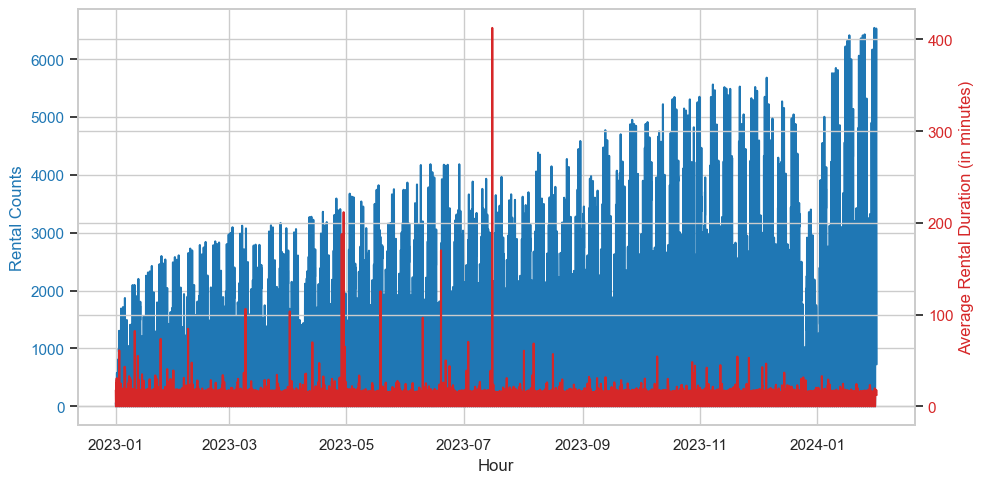

In [63]:
# visualize the data: rental counts and rental duration over entire timeframe

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Hour')
ax1.set_ylabel('Rental Counts', color=color)
ax1.plot(hourly_weather_rentals_filtered.index, hourly_weather_rentals_filtered['rental_counts'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Rental Duration (in minutes)', color=color)
ax2.plot(hourly_weather_rentals_filtered.index, hourly_weather_rentals_filtered['avg_rental_duration'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Rental Counts')

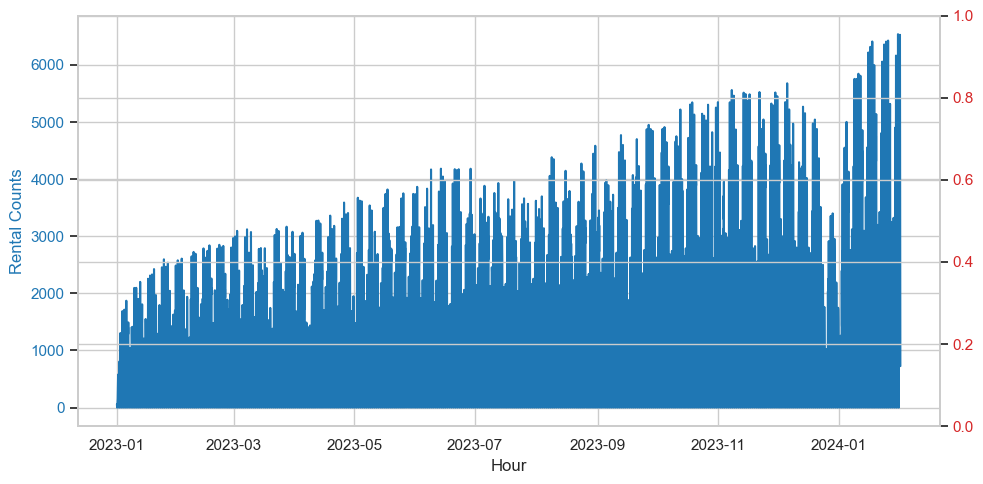

In [64]:

# Filter the data for the specified date range
year_2021 = hourly_weather_rentals[(hourly_weather_rentals.index >= '2023-01-01 00:00:00') & (hourly_weather_rentals.index <= '2024-01-31 23:00:00')]

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Hour')
ax1.set_ylabel('Rental Counts', color=color)
ax1.plot(year_2021.index, year_2021['rental_counts'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis (add is business day)
color = 'tab:red'

ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# business days definitely look busier

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Rental Counts')

Text(0, 0.5, 'Average Rental Duration (in minutes)')

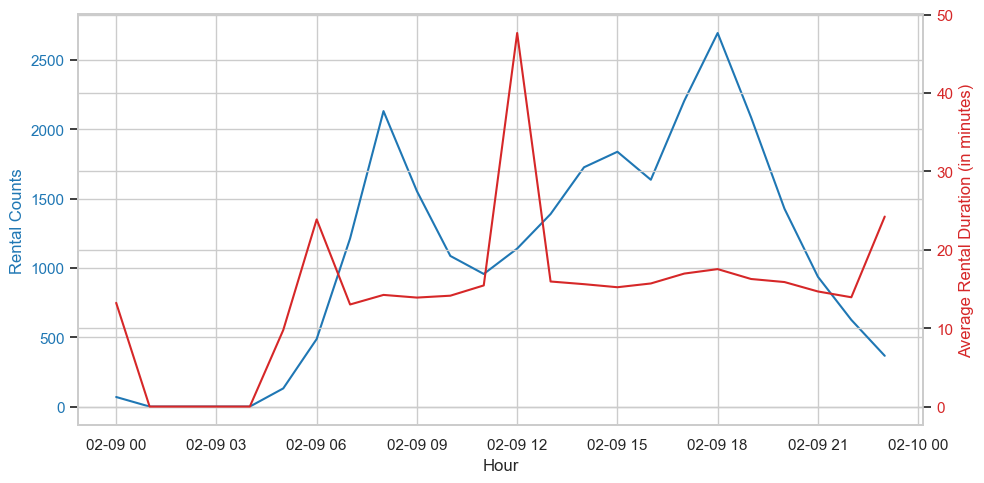

In [65]:
# visualize the data: rental counts and rental duration over one business day in 2023
# Feb 11 2021 = Thursday

# Filter the data for the specified date range
random_day = hourly_weather_rentals[(
    hourly_weather_rentals.index >= '2023-02-09 00:00:00') & (hourly_weather_rentals.index <= '2023-02-09 23:00:00'
                                                               )]

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Hour')
ax1.set_ylabel('Rental Counts', color=color)
ax1.plot(random_day.index, random_day['rental_counts'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Rental Duration (in minutes)', color=color)
ax2.plot(random_day.index, random_day['avg_rental_duration'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Rental Counts')

Text(0, 0.5, 'Average Rental Duration (in minutes)')

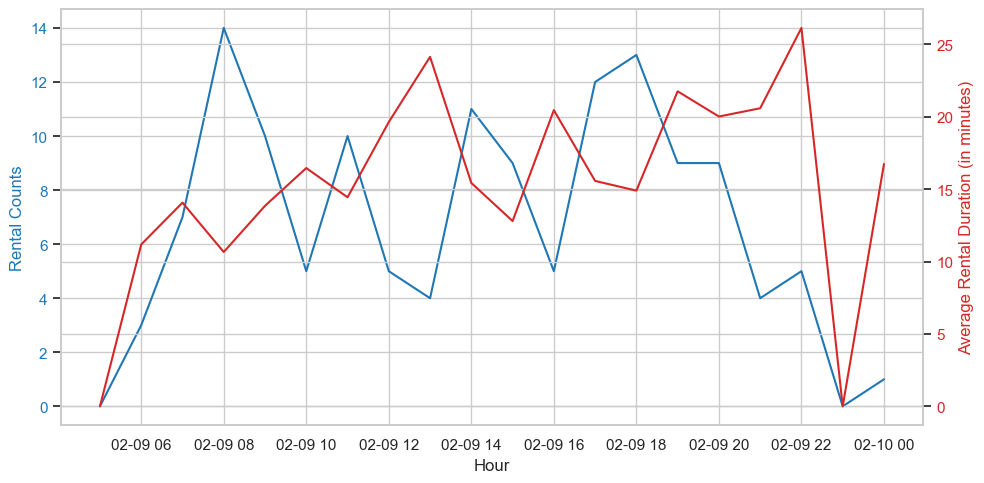

In [66]:
# visualize the data: rental counts and rental duration over one business day for one station in 2021
# Feb 09 2021 = Tuesday
# station 27 third highest pickup counts

# Filter the data for the specified date range
random_day = stations_weather_rentals[6][(
    stations_weather_rentals[6].index >= '2023-02-09 05:00:00') & (stations_weather_rentals[6].index <= '2023-02-10 00:00:00'
                                                               )]

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Hour')
ax1.set_ylabel('Rental Counts', color=color)
ax1.plot(random_day.index, random_day['rental_counts'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Rental Duration (in minutes)', color=color)
ax2.plot(random_day.index, random_day['avg_rental_duration'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<b>Observation:</b> Station 6 seems to follow a "normal" work day seasonality. Station 6 is closer to offices/businesses.

## SARIMAX
<b>Hyperparametres</b><br>

First three from ARIMA:<br>
- <b>p</b>: Order of the AR term – relationship between an observation and a number of lagged observations (auto-regression); captures the effect of past values on current values
- <b>d</b>: Degree of differencing – differencing of raw observations to make the time series stationary (i.e., removing trends or seasonality); represents the number of differences needed to make the series stationary.
- <b>q</b>: Order of the MA term – relationship between the residual error and the lagged observations; captures the dependency between an observation and a residual error from a moving average model.

Last four for SARIMAX, similar to ARIMA hyperparamatres but with seasonal component:<br>
- <b>P</b>: Order of the seasonal AR term.
- <b>D</b>: Degree of seasonal differencing.
- <b>Q</b>: Order of the seasonal MA term.
- <b>m</b>: Seasonal length of the time series (e.g., 12 for monthly data, 4 for quarterly data)

### Seasonal decomposition
Checking out the presence of a seasonal component for one station<br>
<br>
<i>Parameters:</i>
- <b>x</b>: The time series data to be decomposed.
- <b>model</b>: This specifies the type of seasonal decomposition model to be used. It can be either 'additive' or 'multiplicative'.
    - With the 'additive' model, the components are combined linearly, while with the 'multiplicative' model, the components are combined multiplicatively.
- <b>filt</b>: This is an array filtering the trend component. By default, an evenly sized window will be used.
- <b>period</b>: An integer representing the periodicity of the series, i.e. number of observations per cycle. For example, 24 for daily data with hourly observations or 12 for monthly data with yearly observations. This parameter influences the seasonal component of the decomposition.
- <b>two_sided</b>: If True, moving averages are calculated symmetrically. If False, moving averages will be calculated using past values only.

In [55]:
InteractiveShell.ast_node_interactivity = "last_expr"

In [56]:
rental_counts_st6 = pd.Series(stations_weather_rentals[6]['rental_counts'].values, index=stations_weather_rentals[6].index)

In [57]:
rental_counts_st6[:48]

2023-01-01 00:00:00     0.0
2023-01-01 01:00:00     0.0
2023-01-01 02:00:00     0.0
2023-01-01 03:00:00     0.0
2023-01-01 04:00:00     0.0
2023-01-01 05:00:00     0.0
2023-01-01 06:00:00     0.0
2023-01-01 07:00:00     1.0
2023-01-01 08:00:00     1.0
2023-01-01 09:00:00     0.0
2023-01-01 10:00:00     3.0
2023-01-01 11:00:00     1.0
2023-01-01 12:00:00     3.0
2023-01-01 13:00:00     3.0
2023-01-01 14:00:00     4.0
2023-01-01 15:00:00     6.0
2023-01-01 16:00:00     1.0
2023-01-01 17:00:00     4.0
2023-01-01 18:00:00     2.0
2023-01-01 19:00:00     3.0
2023-01-01 20:00:00     0.0
2023-01-01 21:00:00     0.0
2023-01-01 22:00:00     3.0
2023-01-01 23:00:00     1.0
2023-01-02 00:00:00     0.0
2023-01-02 01:00:00     0.0
2023-01-02 02:00:00     0.0
2023-01-02 03:00:00     0.0
2023-01-02 04:00:00     0.0
2023-01-02 05:00:00     1.0
2023-01-02 06:00:00     0.0
2023-01-02 07:00:00     3.0
2023-01-02 08:00:00     9.0
2023-01-02 09:00:00     6.0
2023-01-02 10:00:00     6.0
2023-01-02 11:00:00 

In [58]:
rental_counts_st6.fillna(0,inplace=True)

In [59]:
rental_counts_st6.shape

(9504,)

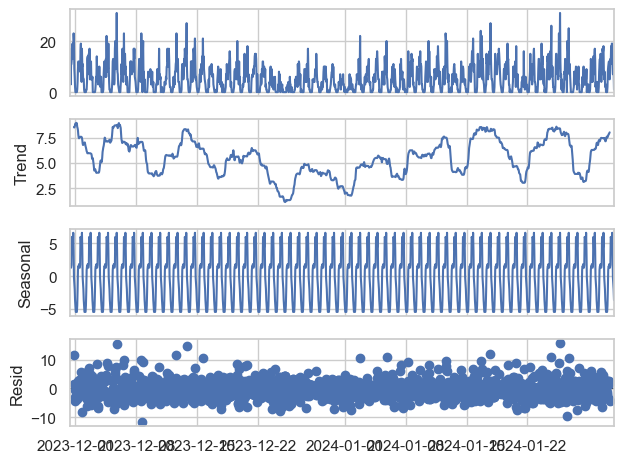

In [60]:
# decompose from observation #8000 onwards so that we can actually see the trends and seasonalities
decomposition = sm.tsa.seasonal_decompose(rental_counts_st6[8000:], 
                                          model='additive',  # no reason (yet) to believe magnitude of variation changes significantly with time
                                         period=24) # since we have hourly data

# Extract the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
decomposition.plot()
plt.show()

# Trending upwards
# seasonality looks to be daily given the density of the plot
# resid is stable looking


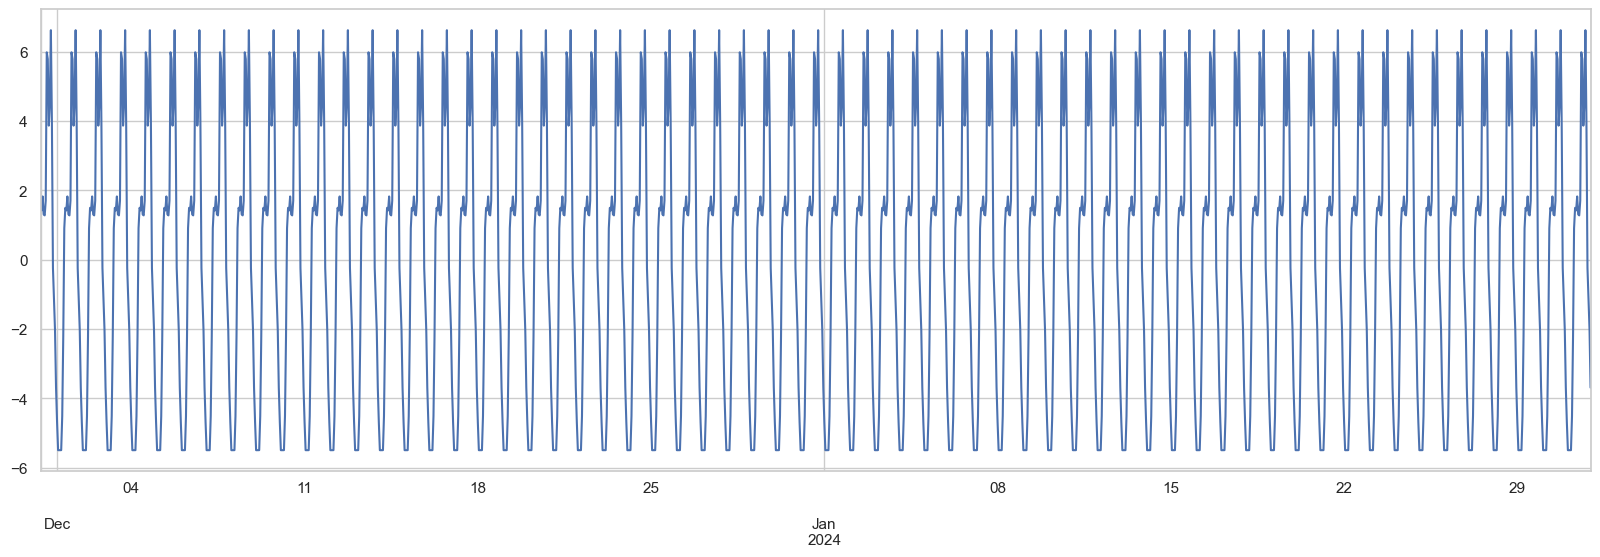

In [61]:
# closer examination at the seasonality, definitely looks daily
seasonal = decomposition.seasonal
plt.figure(figsize=(20, 6))
seasonal.plot()
plt.show()

### ACF and PACF
ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are used to diagnose patterns of autocorrelation in time series data, which can help in identifying the proper hyperparameters for models such as ARIMA and SARIMA, i.e. the order of AR, MA, and ARMA models.<br>
1. <b>Autocorrelation Function (ACF) Plot:</b>
    - The ACF plot shows the autocorrelation of the time series with its own lagged values. Each bar on the plot represents the correlation between the series and its lagged values at various lags.
    - Interpretation: In an ACF plot, significant autocorrelations that extend beyond the critical boundaries indicate the presence of autoregressive (AR) components in the data. For example, if the ACF values decay exponentially, it may indicate the series is stationary and lends itself to an ARIMA model.
<br><br>
2. <b>Partial Autocorrelation Function (PACF) Plot:</b>
    - The PACF plot displays the partial correlation of the time series with its own lagged values, while controlling for the values of the intervening lags.
    - Interpretation: In a PACF plot, significant partial autocorrelations that extend beyond the critical boundaries imply the presence of a moving average (MA) component in the data.

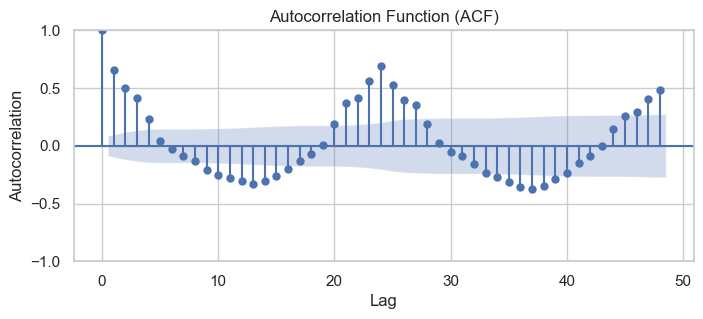

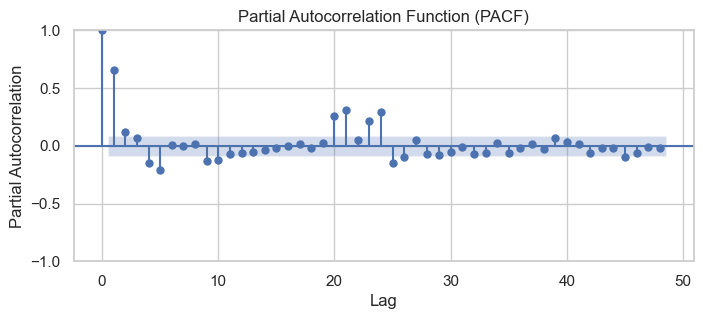

In [63]:
# check the ACF and PACF plots and confirm the presence of seasonality and the seasonal period
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(rental_counts_st6[9000:], ax=ax, lags=48)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(rental_counts_st6[9000:], ax=ax, lags=48)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [64]:
stations_weather_rentals[6].columns

Index(['rental_counts', 'avg_rental_duration', 'is_business_day',
       'temperature_C', 'rel_humidity_perc', 'feels_like_temp_C', 'rain_mm',
       'cloud_cover_perc', 'wind_speed_kmh', 'is_day'],
      dtype='object')

### Splitting the data
starting with station 6

In [62]:
# split our timeseries dataset into train/test sets

def SARIMA_train_test_split(df, test_percentage): # df = dataframe, test_percentage = proportion of df we want to keep for testing
    n_test = int(round(len(df)*test_percentage, 0))
    train = df.iloc[:-n_test]
    test = df.iloc[-n_test:]
    return train, test

#'temperature_C', 'feels_like_temp_C'

In [177]:
train_full, test_full = SARIMA_train_test_split(
    stations_weather_rentals[6].drop(columns = ['avg_rental_duration',
                                                'cloud_cover_perc',
                                               #'rel_humidity_perc'
                                               ],axis=1), 0.20)
test_full.head(30)

,rental_counts,is_business_day,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,wind_speed_kmh,is_day
2023-11-13 19:00:00,12.0,1,22.8,44,22.9,0.1,9.2,1
2023-11-13 20:00:00,7.0,1,23.7,40,23.4,0.0,8.5,1
2023-11-13 21:00:00,9.0,1,24.1,38,23.1,0.0,8.7,1
2023-11-13 22:00:00,7.0,1,23.1,40,20.6,0.0,15.1,1
2023-11-13 23:00:00,1.0,1,22.2,42,19.8,0.0,14.2,1
2023-11-14 00:00:00,0.0,1,21.0,45,18.9,0.0,11.5,0
2023-11-14 01:00:00,0.0,1,19.5,55,18.0,0.0,10.9,0
2023-11-14 02:00:00,0.0,1,17.8,65,16.4,0.0,11.9,0
2023-11-14 03:00:00,0.0,1,16.1,72,14.6,0.0,13.3,0
2023-11-14 04:00:00,0.0,1,15.0,76,13.2,0.0,14.1,0


In [126]:
train_full.columns

Index(['rental_counts', 'is_business_day', 'temperature_C',
       'rel_humidity_perc', 'feels_like_temp_C', 'rain_mm', 'wind_speed_kmh',
       'is_day'],
      dtype='object')

In [127]:
# scale our exogenous variables
scaler = MinMaxScaler()
scaler.fit(train_full.drop('rental_counts',axis=1))
exog_train = scaler.transform(train_full.drop('rental_counts',axis=1))
exog_test = scaler.transform(test_full.drop('rental_counts',axis=1))

In [146]:
# scale our endogenous / target variable

endog_train = pd.DataFrame(train_full['rental_counts'])
endog_test = pd.DataFrame(test_full['rental_counts'])

# pt = PowerTransformer()
# pt.fit(pd.DataFrame(train_full['rental_counts']))

# endog_train = pt.transform(endog_train)
# endog_test = pt.transform(endog_test)

In [147]:
# reset dataframe and column names for endog and exog train and test sets
column_names = ['is_business_day', 'temperature_C', 'rel_humidity_perc', 'feels_like_temp_C', 
                'rain_mm', #'cloud_cover_perc', 
                'wind_speed_kmh', 'is_day']

exog_train = pd.DataFrame(exog_train, columns=column_names)
exog_test = pd.DataFrame(exog_test, columns=column_names)

endog_train = pd.DataFrame(endog_train, columns=['rental_counts'])
endog_test = pd.DataFrame(endog_test, columns=['rental_counts'])

endog_test


,rental_counts
2023-11-13 19:00:00,12.0
2023-11-13 20:00:00,7.0
2023-11-13 21:00:00,9.0
2023-11-13 22:00:00,7.0
2023-11-13 23:00:00,1.0
...,...
2024-01-31 19:00:00,12.0
2024-01-31 20:00:00,7.0
2024-01-31 21:00:00,7.0
2024-01-31 22:00:00,9.0


In [130]:
# reset index to datetime

# train_index = pd.date_range(start='2023-01-01 00:00:00', end='2023-11-13 18:00:00', freq='H')
# test_index = pd.date_range(start='2023-11-13 19:00:00', end='2024-01-31 23:00:00', freq='H')

# exog_train['date']= train_index
# exog_train.set_index('date', inplace=True)

# exog_test['date']= test_index
# exog_test.set_index('date', inplace=True)

# endog_train['date']= train_index
# endog_train.set_index('date', inplace=True)

# endog_test['date']= test_index
# endog_test.set_index('date', inplace=True)

### Grid search for best hyperparameters

In [69]:
import itertools
import math
import warnings
warnings.filterwarnings('ignore')

In [131]:
# Define the range of values for p, d, q, P, D, Q, and m
p_values = range(0, 3)  # Autoregressive order
d_values = [0]          # Differencing order
q_values = range(0, 3)  # Moving average order
P_values = range(0, 3)  # Seasonal autoregressive order
D_values = range(0, 2)  # Seasonal differencing order
Q_values = range(0, 3)  # Seasonal moving average order
m_values = [24]         # Seasonal period

# Create all possible combinations of SARIMA parameters
param_combinations = list(itertools.product(p_values, 
                                            d_values, 
                                            q_values, 
                                            P_values, 
                                            D_values, 
                                            Q_values, 
                                            m_values))

# Initialize AIC with a large value (positive infinity = "inf")
best_aic = float("inf")  
best_params = None

# Perform grid search
for params in param_combinations:
    order = params[:3]
    seasonal_order = params[3:]
    
    try:
        model = sm.tsa.SARIMAX(endog=endog_train, 
                               exog=exog_train, 
                               order=order, 
                               seasonal_order=seasonal_order)
        result = model.fit(disp=False, method='nm')
        aic = result.aic
        
        # Ensure the convergence of the model
        if not math.isinf(result.zvalues.mean()):
            print(order, seasonal_order, aic)
        
            if aic < best_aic:
                best_aic = aic
                best_params = params
                
        else:
            print(order, seasonal_order, 'not converged')

    except:
        continue

# Print the best parameters and AIC
print("Best Parameters:", best_params)
print("Best AIC:", best_aic)


(0, 0, 0) (0, 0, 0, 24) 44531.577896312745
(0, 0, 0) (0, 0, 1, 24) 41537.17823450999
(0, 0, 0) (0, 0, 2, 24) 41141.87978448103
(0, 0, 0) (0, 1, 0, 24) 43652.27876039907
(0, 0, 0) (0, 1, 1, 24) 38552.40599480605
(0, 0, 0) (0, 1, 2, 24) 38204.30959273898
(0, 0, 0) (1, 0, 0, 24) 40797.64908702879
(0, 0, 0) (1, 0, 1, 24) 39717.476044195915
(0, 0, 0) (1, 0, 2, 24) 39853.74668923287
(0, 0, 0) (1, 1, 0, 24) 40789.91526368814
(0, 0, 0) (1, 1, 1, 24) 38506.972898273314
(0, 0, 0) (1, 1, 2, 24) 38237.80270545975
(0, 0, 0) (2, 0, 0, 24) 40424.96866815933
(0, 0, 0) (2, 0, 1, 24) 40019.809706518725
(0, 0, 0) (2, 0, 2, 24) 39615.620878652444
(0, 0, 0) (2, 1, 0, 24) 40182.31919285735
(0, 0, 0) (2, 1, 1, 24) 38741.66254335873
(0, 0, 0) (2, 1, 2, 24) 38259.32023185705
(0, 0, 1) (0, 0, 0, 24) 41682.02978440119
(0, 0, 1) (0, 0, 1, 24) 40948.666707945944
(0, 0, 1) (0, 0, 2, 24) 40663.37841107748
(0, 0, 1) (0, 1, 0, 24) 42103.45939807908
(0, 0, 1) (0, 1, 1, 24) 38944.92074370592
(0, 0, 1) (0, 1, 2, 24) 3817

### Fitting SARIMAX + Predictions

<b>Model 8.1</b><br>
order=(2, 0, 2), seasonal_order=(2, 1, 2, 24)<br>
drop: 'cloud_cover_perc', 'rel_humidity_perc'<br>
Target variable powertransformed<br>
<br>
<b>Model 8.2</b><br>
order=(1, 0, 1), seasonal_order=(2, 1, 2, 24)<br>
drop: nothing<br>
Target variable powertransformed<br>
<br>
<b>Model 9</b><br>
order=(2, 0, 1), seasonal_order=(0, 1, 2, 24)<br>
drop: cloud cover<br>
target variable not transformed<br>
<br>


In [148]:
# Assuming 'endog' contains the time series variable and 'exog' contains the exogenous variables
# Assuming 'y' is the rental_counts variable
# change the solver when fitting, L-BFGS-B is better for small datasets
    ## NOTE: Need to re-run the grid search to fit with method='nm'


# Fit the SARIMAX model
model = sm.tsa.SARIMAX(endog_train, \
                       exog=exog_train, order=(2, 0, 1), seasonal_order=(0, 1, 2, 24))
results = model.fit(method='nm') 

In [149]:
results.summary()

# The “P>|z|” column provides the p-value associated with each coefficient, 
# for all cases they are lower than 0.05, our significance level, except for temperature
# which means that all of them are statistically significant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                           rental_counts   No. Observations:                 7603
Model:             SARIMAX(2, 0, 1)x(0, 1, [1, 2], 24)   Log Likelihood              -19052.243
Date:                                 Fri, 08 Mar 2024   AIC                          38130.486
Time:                                         18:38:22   BIC                          38220.617
Sample:                                     01-01-2023   HQIC                         38161.420
                                          - 11-13-2023                                         
Covariance Type:                                   opg                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
is_business_day       2.4036      0.090     26.774      0.000       2.228       2.580
temperature_C         3.9141      3.556      1.101      0.271      -3.056      10.884
rel_humidity_perc     0.0695      0.713      0.098      0.922      -1.327       1.466
feels_like_temp_C    -1.9385      2.949     -0.657      0.511      -7.718       3.841
rain_mm              -0.1876      0.988     -0.190      0.849      -2.123       1.748
wind_speed_kmh       -0.1315      0.702     -0.187      0.851      -1.508       1.245
is_day               -0.9078      0.713     -1.273      0.203      -2.306       0.490
ar.L1                 0.2661      0.205      1.298      0.194      -0.136       0.668
ar.L2                 0.0301      0.025      1.227      0.220      -0.018       0.078
ma.L1                -0.1700      0.205     -0.829      0.407      -0.572       0.232
ma.S.L24             -0.7376      0.009    -83.352      0.000      -0.755      -0.720
ma.S.L48             -0.1728      0.009    -19.162      0.000      -0.190      -0.155
sigma2                8.5257      0.101     84.404      0.000       8.328       8.724
===================================================================================
Ljung-Box (L1) (Q):                  10.65   Jarque-Bera (JB):              1543.27
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                             0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

mean error: on average, the model tends to overestimate the target values by 0.92 units
mean squared error: A mean squared error of 20.66 indicates the average squared magnitude of the prediction errors. It provides a sense of the overall variability or dispersion of the errors.
mean absolute error: A mean absolute error of 3.46 signifies the average magnitude of the errors without considering their direction.
root mean squared error: An RMSE of 4.55 suggests the typical size of the errors (standard deviations) generated by the model.
12:34
### Assessing our SARIMAX model
In our summary, the <b>“P>|z|”</b> provides the p-value associated with each coefficient. For the coefficient to be significant, they should be lower than our significance level of 0.05.<br>
<br>
Examining our model's <b>plot diagnostics</b>, we want to see:
1. The standardized residual shouldn’t have any obvious patterns, i.e. random noise, data with a zero mean and a uniform variance. The residuals should be uncorrelated with Gaussian noise centered on zero.
2. The histogram plus KDE estimate should look similar to a normal distribution
3. In the Normal Q-Q graph, we should observe the majority of the points lying on the straight line, indicating a normal distribution of the residuals.
    - <i>(quantile-quantile graph: graphical comparison between the empirical quantiles of the data and the quantiles of the theoretical distribution)</i>
4. In the ACF or correlogram, 95% of correlations for lag greater than one should be within the confidence band, i.e. not significant.







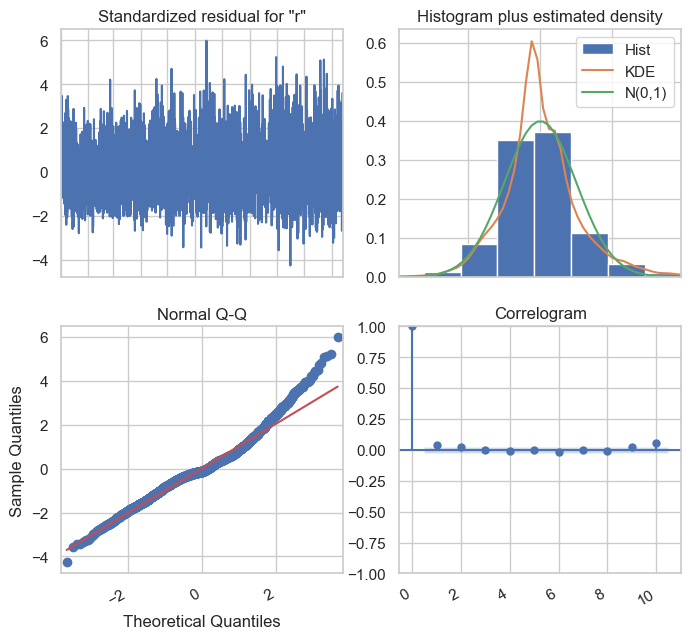

In [150]:
fig = results.plot_diagnostics(figsize=(8, 8))
fig.autofmt_xdate()
plt.show()

# 1. standardized residual looks heavier for the first half
# 2. histogram and KDE are somewhat normally distributed
# 3. In the Normal Q-Q graph, points don't completely lie on the straight line
# 4. 1st and last lags not within confidence band

In [172]:
import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Save the model to a file
with open('sarimax_model_9.pkl', 'wb') as f:
    pickle.dump(results, f)
    
# Save the scaler to a file
with open('scaler_9.pkl', 'wb') as f:
    pickle.dump(scaler, f)
    
# Save the transformer to a file
# with open('transformer_8.2.pkl', 'wb') as f:
#     pickle.dump(pt, f)

# Load the model from the file
# with open('sarimax_model_9.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)


In [151]:
# get predictions for test set
# set prediction period 
start_datetime = pd.Timestamp('2023-11-13 19:00:00')
end_datetime = pd.Timestamp('2024-01-31 23:00:00')

# Make predictions and inverse transform
predictions = pd.DataFrame(results.predict(start=start_datetime, end=end_datetime, exog=exog_test))
predictions = predictions.rename(columns={'predicted_mean': 'rental_counts'})
# predictions_inv = pd.DataFrame(pt.inverse_transform(predictions))

# # reset index and column names for predictions
# predictions_inv = predictions_inv.rename(columns={0: 'rental_counts'})
# predictions_inv['date'] = test_index
# predictions_inv.set_index('date', inplace=True)
# predictions_inv = pd.Series(predictions_inv.rental_counts)

In [160]:
predictions

,rental_counts
2023-11-13 19:00:00,10.446483
2023-11-13 20:00:00,7.837948
2023-11-13 21:00:00,5.453982
2023-11-13 22:00:00,4.305336
2023-11-13 23:00:00,2.995967
...,...
2024-01-31 19:00:00,10.465747
2024-01-31 20:00:00,7.918827
2024-01-31 21:00:00,5.562604
2024-01-31 22:00:00,4.339342


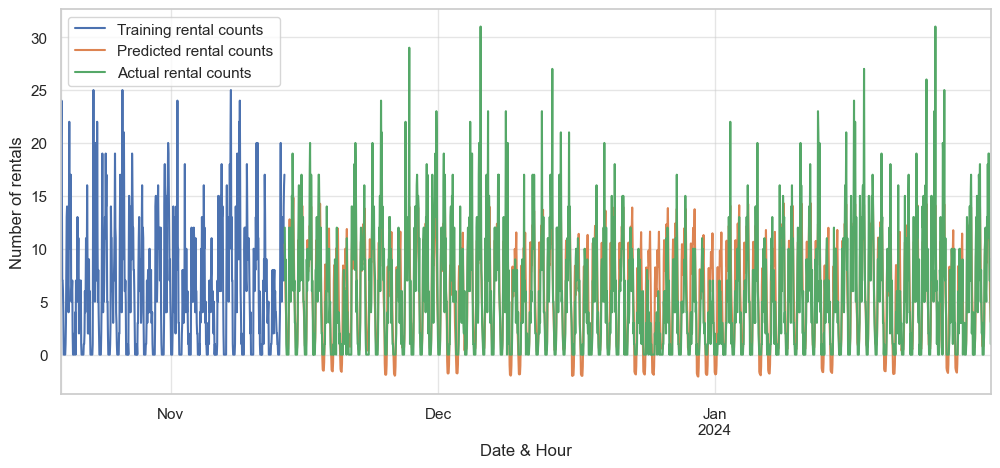

In [162]:
# Plot test predictions with training data

ax = endog_train[7000:].plot(figsize=(12,5))
predictions.plot(ax=ax)
endog_test.plot(ax=ax)
plt.legend(['Training rental counts', 
            'Predicted rental counts', 
            'Actual rental counts'], 
           loc='upper left')
plt.xlabel('Date & Hour')
plt.ylabel('Number of rentals')
plt.grid(alpha=0.5)
plt.show()

In [163]:
# predictions_inv

In [165]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
# calculate residuals of our test data and predictions
test_residuals = pd.DataFrame({'rental_counts': test_full['rental_counts'], 'predictions': predictions.rental_counts.values}, index=predictions.rental_counts.index)
test_residuals['residuals'] = test_residuals['rental_counts']-test_residuals['predictions']
test_residuals

# calculating error metrics for test data

me_test = round(test_residuals.residuals.mean(),2)
print(f'mean error of test: {me_test}')

mse_test = round(mse(test_full['rental_counts'],predictions),2) # mean squared error
print(f'mean squared error of test: {mse_test}')

mae_test = round(mae(test_full['rental_counts'],predictions),2) # mean absolute error
print(f'mean absolute error of test: {mae_test}')

rmse_test = round(mse(test_full['rental_counts'],predictions,squared=False),2) # root mean squared error
print(f'root mean squared error of test: {rmse_test}')

mean error of test: -0.4
mean squared error of test: 11.83
mean absolute error of test: 2.53
root mean squared error of test: 3.44


In [196]:
test_residuals.head(50)

,rental_counts,predictions,residuals
2023-11-13 19:00:00,12.0,10.446483,1.553517
2023-11-13 20:00:00,7.0,7.837948,-0.837948
2023-11-13 21:00:00,9.0,5.453982,3.546018
2023-11-13 22:00:00,7.0,4.305336,2.694664
2023-11-13 23:00:00,1.0,2.995967,-1.995967
2023-11-14 00:00:00,0.0,1.642357,-1.642357
2023-11-14 01:00:00,0.0,0.578285,-0.578285
2023-11-14 02:00:00,0.0,0.533637,-0.533637
2023-11-14 03:00:00,0.0,0.503563,-0.503563
2023-11-14 04:00:00,0.0,0.515645,-0.515645


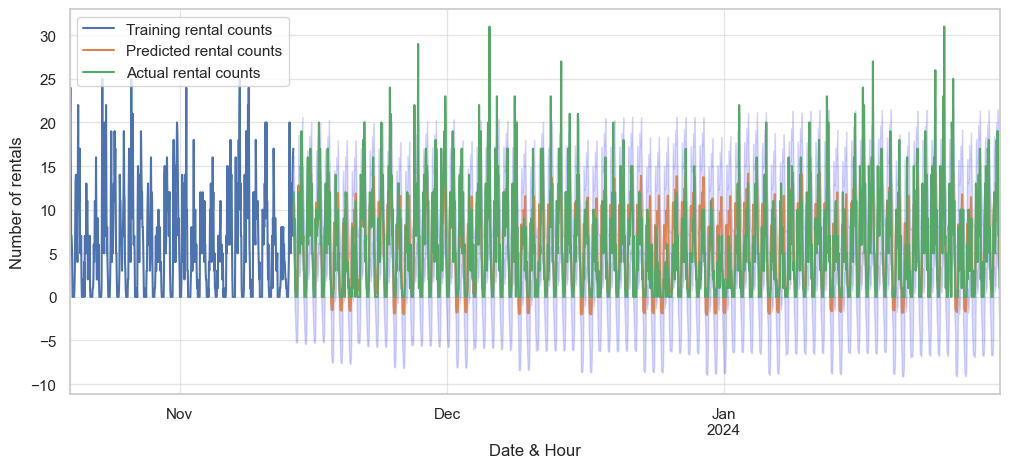

In [170]:
# CAN'T FIGURE OUT CONFIDENCE INTERVALS WITH TRANSFORMED TARGET VARIABLE
# Plot test forecast with training data (same as above but diff function, with confidence intervals)

forecast = results.get_forecast(steps=1901, exog=exog_test) # steps = number of rows in test set
confidence_intervals = forecast.conf_int()
forecast = pd.DataFrame(forecast.predicted_mean)

# inverse transform, reset index and column names for forecast
# forecast = forecast.rename(columns={'predicted_mean': 'rental_counts'})
# forecast_inv = pd.DataFrame(forecast)
# forecast_inv = forecast_inv.rename(columns={0: 'rental_counts'})
# forecast_inv['date'] = test_index
# forecast_inv.set_index('date', inplace=True)
# forecast_inv = pd.Series(forecast_inv.rental_counts)

# plot
ax = train_full['rental_counts'][7000:].plot(figsize=(12,5))
forecast.plot(ax=ax)
test_full['rental_counts'].plot(ax=ax)
plt.fill_between(forecast.index, 
                 confidence_intervals['lower rental_counts'], 
                 confidence_intervals['upper rental_counts'], 
                 color='blue',
                 alpha=0.15)
plt.legend(['Training rental counts', 
            'Predicted rental counts', 
            'Actual rental counts'], 
           loc='upper left')
plt.xlabel('Date & Hour')
plt.ylabel('Number of rentals')
plt.grid(alpha=0.5)
plt.show()

In [190]:
exog_6

,avg_rental_duration,is_business_day,temperature_C,rel_humidity_perc,feels_like_temp_C,rain_mm,cloud_cover_perc,wind_speed_kmh,is_day
2023-01-01 00:00:00,0.00,0,16.6,65,15.9,0.0,32,5.1,1
2023-01-01 01:00:00,0.00,0,15.9,62,14.2,0.0,23,9.6,0
2023-01-01 02:00:00,0.00,0,14.3,66,12.3,0.0,14,10.5,0
2023-01-01 03:00:00,0.00,0,12.6,75,11.3,0.0,0,5.6,0
2023-01-01 04:00:00,0.00,0,12.9,65,11.7,0.0,3,2.2,0
...,...,...,...,...,...,...,...,...,...
2024-01-31 19:00:00,19.37,1,18.8,26,15.5,0.0,75,6.6,1
2024-01-31 20:00:00,17.41,1,20.8,20,17.2,0.0,85,7.5,1
2024-01-31 21:00:00,12.78,1,21.7,20,18.4,0.0,79,6.9,1
2024-01-31 22:00:00,15.53,1,21.7,20,18.3,0.0,85,6.8,1


In [192]:
# rerun model on full data, save to pickle so that forecast can be generated with future dates
station_6 = stations_weather_rentals[6]
endog_6 = station_6['rental_counts']
exog_6 = station_6.drop(['rental_counts','cloud_cover_perc','avg_rental_duration'], axis=1)

# Fit the SARIMAX model
model_full = sm.tsa.SARIMAX(endog_6, \
                       exog=exog_6, order=(2, 0, 1), seasonal_order=(0, 1, 2, 24))
results = model_full.fit(method='nm') 

In [193]:
# Save the model to a file
with open('sarimax_model_9.pkl', 'wb') as f:
    pickle.dump(results, f)